-  Date: 11/21
-  Last Updated: 12/04
-  Notebook Owner: Reza Naiman
    
    
    
# Key findings

## Model Performance
- The combined weather and flight data model performed the best overall, with accuracies of 0.65 (training), 0.57 (validation), and 0.56 (testing). This indicates that combining weather and flight data provides a more comprehensive view for predictions.


- The weather-only model achieved similar validation and testing accuracies (0.57 and 0.56, respectively) but slightly lower training accuracy (0.62), suggesting weather data alone captures significant but not all predictive signals.

- The flight-only model showed the weakest performance, particularly on the validation set (accuracy: 0.38), highlighting that flight data alone may not be sufficient for reliable predictions.

## Feature Importance
- Weather Features:
   - The most critical weather features were Apparent Temperature Fahrenheit and Hourly Precipitation Inches, appearing in both the combined and weather-only models.This emphasizes the impact of weather conditions on the outcomes.
- Flight Features:
   - Day of Month and Scheduled Departure Time were the key features in the flight-only model, suggesting that scheduling and timing are relevant but not as impactful as weather-related factors.
   
## Suggestions
- Combining weather and flight data is essential for better predictive performance, as no single dataset is sufficient on its own.Weather conditions, particularly temperature and precipitation, consistently stand out as critical predictive factors based on the Decision Tree Models.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
import shap


### Data cleaning and preparation for Illinois and Georgia datasets

In [2]:
# Load and inspect the data
df = pd.read_csv("C:/Users/rezan/OneDrive/Documents/Fall 2024/Capstone/Illinois_10_years_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2969937 entries, 0 to 2969936
Data columns (total 31 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Year                              int64  
 1   Quarter                           int64  
 2   Month                             int64  
 3   Day_of_Month                      float64
 4   Day_of_Week                       float64
 5   Operating_Carrier_Code            object 
 6   Tail_Number                       object 
 7   Origin_Airport_ID                 float64
 8   Origin_Airport_Code               object 
 9   Origin_State_Name                 object 
 10  Destination_Airport_Code          object 
 11  Destination_State_Name            object 
 12  Scheduled_Departure_Time          float64
 13  Departure_Delay_Minutes           float64
 14  Taxi_Out_Time_Minutes             float64
 15  Flight_Distance_Miles             float64
 16  Departure_Datetime                ob

In [3]:
df_g = pd.read_csv("C:/Users/rezan/OneDrive/Documents/Fall 2024/Capstone/Georgia_10_years_data.csv")
df_g.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107731 entries, 0 to 3107730
Data columns (total 31 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Year                              int64  
 1   Quarter                           int64  
 2   Month                             int64  
 3   Day_of_Month                      float64
 4   Day_of_Week                       float64
 5   Operating_Carrier_Code            object 
 6   Tail_Number                       object 
 7   Origin_Airport_ID                 float64
 8   Origin_Airport_Code               object 
 9   Origin_State_Name                 object 
 10  Destination_Airport_Code          object 
 11  Destination_State_Name            object 
 12  Scheduled_Departure_Time          float64
 13  Departure_Delay_Minutes           float64
 14  Taxi_Out_Time_Minutes             float64
 15  Flight_Distance_Miles             float64
 16  Departure_Datetime                ob

In [4]:
# Drop unnecessary columns
df = df.drop(['Origin_State_Name', 'Departure_Datetime', 'Departure_Delay_Minutes','Taxi_Out_Time_Minutes'], axis=1)
df_g = df_g.drop(['Origin_State_Name', 'Departure_Datetime', 'Departure_Delay_Minutes','Taxi_Out_Time_Minutes'], axis=1)
df.dropna(inplace=True)
df_g.dropna(inplace=True)

In [5]:
# Convert integer features to int32
int_columns = [
    'Year',
    'Quarter',
    'Month',
    'Day_of_Month',
    'Day_of_Week',
    'Scheduled_Departure_Time',
    'Scheduled_Departure_Time_Minutes',
    'Target'
]

for col in int_columns:
    df[col] = df[col].astype(np.int32)
    df_g[col] = df_g[col].astype(np.int32)

In [6]:
# Convert continuous numeric features to float32
float_columns = [

    'Flight_Distance_Miles',
    'Air_Temperature_Fahrenheit',
    'Dew_Point_Temperature_Fahrenheit',
    'Relative_Humidity_Percent',
    'Wind_Direction_Degrees',
    'Wind_Speed_Knots',
    'Hourly_Precipitation_Inches',
    'Pressure_Altimeter_Inches',
    'Sea_Level_Pressure_Millibar',
    'Visibility_Miles',
    'Sky_Level_1_Altitude_Feet',
    'Apparent_Temperature_Fahrenheit',
]

for col in float_columns:
    df[col] = df[col].astype(np.float32)
    df_g[col] = df_g[col].astype(np.float32)

In [7]:
# Convert categorical features to 'category' dtype
categorical_columns = [
    'Operating_Carrier_Code',
    'Tail_Number',
    'Origin_Airport_ID',
    'Origin_Airport_Code',
    'Destination_Airport_Code',
    'Destination_State_Name',
    'Sky_Cover_Level_1'
]

for col in categorical_columns:
    df[col] = df[col].astype('category')
    df_g[col] = df_g[col].astype('category')

In [8]:
"""
categorical_cols = [
    'Operating_Carrier_Code',
    'Tail_Number',
    'Origin_Airport_ID',
    'Origin_Airport_Code',
    'Destination_Airport_Code',
    'Destination_State_Name',
    'Sky_Cover_Level_1'
]

# Perform one-hot encoding and save back to df
df = pd.get_dummies(df, columns=categorical_cols)
df_g = pd.get_dummies(df_g, columns=categorical_cols)

"""


"\ncategorical_cols = [\n    'Operating_Carrier_Code',\n    'Tail_Number',\n    'Origin_Airport_ID',\n    'Origin_Airport_Code',\n    'Destination_Airport_Code',\n    'Destination_State_Name',\n    'Sky_Cover_Level_1'\n]\n\n# Perform one-hot encoding and save back to df\ndf = pd.get_dummies(df, columns=categorical_cols)\ndf_g = pd.get_dummies(df_g, columns=categorical_cols)\n\n"

In [9]:
df.info()
df_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2969937 entries, 0 to 2969936
Data columns (total 27 columns):
 #   Column                            Dtype   
---  ------                            -----   
 0   Year                              int32   
 1   Quarter                           int32   
 2   Month                             int32   
 3   Day_of_Month                      int32   
 4   Day_of_Week                       int32   
 5   Operating_Carrier_Code            category
 6   Tail_Number                       category
 7   Origin_Airport_ID                 category
 8   Origin_Airport_Code               category
 9   Destination_Airport_Code          category
 10  Destination_State_Name            category
 11  Scheduled_Departure_Time          int32   
 12  Flight_Distance_Miles             float32 
 13  Scheduled_Departure_Time_Minutes  int32   
 14  Air_Temperature_Fahrenheit        float32 
 15  Dew_Point_Temperature_Fahrenheit  float32 
 16  Relative_Humidity_

In [13]:
df.shape
df_g.shape

(3107731, 27)

In [14]:
df.head()

,Year,Quarter,Month,Day_of_Month,Day_of_Week,Operating_Carrier_Code,Tail_Number,Origin_Airport_ID,Origin_Airport_Code,Destination_Airport_Code,...,Wind_Direction_Degrees,Wind_Speed_Knots,Hourly_Precipitation_Inches,Pressure_Altimeter_Inches,Sea_Level_Pressure_Millibar,Visibility_Miles,Sky_Cover_Level_1,Sky_Level_1_Altitude_Feet,Apparent_Temperature_Fahrenheit,Target
0,2014,2,4,1,2,AA,N359AA,13930.0,ORD,DFW,...,260.0,15.0,0.0,30.0,1014.200012,10.0,SCT,22000.0,40.279999,0
1,2014,2,4,1,2,AA,N3ADAA,13930.0,ORD,LAS,...,260.0,24.0,0.0,30.0,1008.900024,10.0,SCT,2800.0,20.440001,0
2,2014,2,4,1,2,AA,N3AKAA,13930.0,ORD,MIA,...,220.0,15.0,0.0,30.0,1004.200012,10.0,SCT,4300.0,55.040001,0
3,2014,2,4,1,2,AA,N3AKAA,13930.0,ORD,SEA,...,250.0,20.0,0.0,30.0,1011.500000,10.0,OVC,2600.0,21.740000,0
4,2014,2,4,1,2,AA,N3ANAA,13930.0,ORD,LAX,...,220.0,15.0,0.0,30.0,1004.200012,10.0,CLR,4700.0,55.259998,0


In [15]:
df_g.head()

,Year,Quarter,Month,Day_of_Month,Day_of_Week,Operating_Carrier_Code,Tail_Number,Origin_Airport_ID,Origin_Airport_Code,Destination_Airport_Code,...,Wind_Direction_Degrees,Wind_Speed_Knots,Hourly_Precipitation_Inches,Pressure_Altimeter_Inches,Sea_Level_Pressure_Millibar,Visibility_Miles,Sky_Cover_Level_1,Sky_Level_1_Altitude_Feet,Apparent_Temperature_Fahrenheit,Target
0,2014,2,4,1,2,AA,N012AA,10397.0,ATL,DFW,...,210.0,10.0,0.0,30.0,1018.200012,10.0,FEW,12000.0,78.419998,0
1,2014,2,4,1,2,AA,N013AA,10397.0,ATL,DFW,...,70.0,1.0,0.0,30.0,1018.700012,10.0,BKN,25000.0,57.020000,0
2,2014,2,4,1,2,AA,N015AA,10397.0,ATL,DFW,...,310.0,6.0,0.0,30.0,1021.299988,10.0,SCT,12000.0,65.300003,0
3,2014,2,4,1,2,AA,N3AWAA,10397.0,ATL,MIA,...,300.0,5.0,0.0,30.0,1021.200012,10.0,SCT,12000.0,66.559998,0
4,2014,2,4,1,2,AA,N3BUAA,10397.0,ATL,MIA,...,290.0,3.0,0.0,30.0,1018.599976,10.0,BKN,25000.0,56.480000,0


Now we subset the data to get data for four seasons. We will use January for winter, April for spring, July for summer and October for fall.

In [16]:
winter_il = df[df['Month'] == 1]
spring_il = df[df['Month'] == 4]
summer_il = df[df['Month'] == 7]
fall_il = df[df['Month'] == 10]

winter_ga = df_g[df_g['Month'] == 1]
spring_ga = df_g[df_g['Month'] == 4]
summer_ga = df_g[df_g['Month'] == 7]
fall_ga = df_g[df_g['Month'] == 10]

In [17]:
# IL sperating flight and weather data into its seprate dataframes
#winter
winter_il_flight = winter_il.iloc[:, :14]
winter_il_flight['Target'] = winter_il['Target']
winter_il_weather = winter_il.iloc[:, 14:]
winter_il_weather['Target'] = winter_il['Target']
winter_il_weather['Year'] = winter_il['Year']


#spring
spring_il_flight = spring_il.iloc[:, :14]
spring_il_flight['Target'] = spring_il['Target']
spring_il_weather = spring_il.iloc[:, 14:]
spring_il_weather['Target'] = spring_il['Target']
spring_il_weather['Year'] = spring_il['Year']

#summer
summer_il_flight = summer_il.iloc[:, :14]
summer_il_flight['Target'] = summer_il['Target']
summer_il_weather = summer_il.iloc[:, 14:]
summer_il_weather['Target'] = summer_il['Target']
summer_il_weather['Year'] = summer_il['Year']


#fall
fall_il_flight = fall_il.iloc[:, :14]
fall_il_flight['Target'] = fall_il['Target']
fall_il_weather = fall_il.iloc[:, 14:]
fall_il_weather['Target'] = fall_il['Target']
fall_il_weather['Year'] = fall_il['Year']


# GA
#winter
winter_ga_flight = winter_ga.iloc[:, :14]
winter_ga_flight['Target'] = winter_ga['Target']
winter_ga_weather = winter_ga.iloc[:, 14:]
winter_ga_weather['Target'] = winter_ga['Target']
winter_ga_weather['Year'] = winter_ga['Year']


#spring
spring_ga_flight = spring_ga.iloc[:, :14]
spring_ga_flight['Target'] = spring_ga['Target']
spring_ga_weather = spring_ga.iloc[:, 14:]
spring_ga_weather['Target'] = spring_ga['Target']
spring_ga_weather['Year'] = spring_ga['Year']

#summer
summer_ga_flight = summer_ga.iloc[:, :14]
summer_ga_flight['Target'] = summer_ga['Target']
summer_ga_weather = summer_ga.iloc[:, 14:]
summer_ga_weather['Target'] = summer_ga['Target']
summer_ga_weather['Year'] = summer_ga['Year']

#fall
fall_ga_flight = fall_ga.iloc[:, :14]
fall_ga_flight['Target'] = fall_ga['Target']
fall_ga_weather = fall_ga.iloc[:, 14:]
fall_ga_weather['Target'] = fall_ga['Target']
fall_ga_weather['Year'] = fall_ga['Year']

In [18]:
# Define years for train, validation, and test sets
train_years = [2014, 2015, 2016, 2017, 2018, 2019]
val_years = [2020, 2021, 2022]
test_years = [2023, 2024]

# Winter (January) Models for Illinois Data

In [19]:
# prompt: for winter_il, winter_il_flight and winter_il_weather split the data into training, testing, and validation given those years

# Split data into train, validation, and test sets for winter_il, winter_il_flight, and winter_il_weather
# Assuming 'Year' column exists in your dataframes

winter_il_train = winter_il[winter_il['Year'].isin(train_years)]
winter_il_val = winter_il[winter_il['Year'].isin(val_years)]
winter_il_test = winter_il[winter_il['Year'].isin(test_years)]

winter_il_flight_train = winter_il_flight[winter_il_flight['Year'].isin(train_years)]
winter_il_flight_val = winter_il_flight[winter_il_flight['Year'].isin(val_years)]
winter_il_flight_test = winter_il_flight[winter_il_flight['Year'].isin(test_years)]

winter_il_weather_train = winter_il_weather[winter_il_weather['Year'].isin(train_years)]
winter_il_weather_val = winter_il_weather[winter_il_weather['Year'].isin(val_years)]
winter_il_weather_test = winter_il_weather[winter_il_weather['Year'].isin(test_years)]

In [20]:
# Convert categorical variables to numerical codes

winter_il_train = winter_il_train.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
winter_il_val = winter_il_val.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
winter_il_test = winter_il_test.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)

winter_il_flight_train = winter_il_flight_train.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
winter_il_flight_val = winter_il_flight_val.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
winter_il_flight_test = winter_il_flight_test.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)

winter_il_weather_train = winter_il_weather_train.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
winter_il_weather_val = winter_il_weather_val.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
winter_il_weather_test = winter_il_weather_test.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)

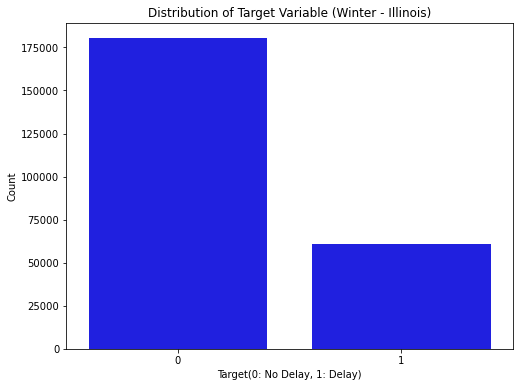

In [30]:
# prompt: plot the distribution of the Target variable

# Plot the distribution of the 'Target' variable for the winter_il dataset
plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=winter_il, color = 'blue')
plt.title('Distribution of Target Variable (Winter - Illinois)')
plt.xlabel('Target(0: No Delay, 1: Delay)')
plt.ylabel('Count')
plt.show()

In [31]:
from sklearn.preprocessing import LabelEncoder

smote = SMOTE(random_state=42)

X_winter_il_train = winter_il_train.drop('Target', axis=1)
y_winter_il_train = winter_il_train['Target']
X_winter_il_train_res, y_winter_il_train_res = smote.fit_resample(X_winter_il_train, y_winter_il_train)

X_winter_il_flight_train = winter_il_flight_train.drop('Target', axis=1)
y_winter_il_flight_train = winter_il_flight_train['Target']
X_winter_il_flight_train_res, y_winter_il_flight_train_res = smote.fit_resample(X_winter_il_flight_train, y_winter_il_flight_train)

X_winter_il_weather_train = winter_il_weather_train.drop('Target', axis=1)
y_winter_il_weather_train = winter_il_weather_train['Target']
X_winter_il_weather_train_res, y_winter_il_weather_train_res = smote.fit_resample(X_winter_il_weather_train, y_winter_il_weather_train)

# Combine the resampled features and target variable
winter_il_train_res = pd.concat([X_winter_il_train_res, y_winter_il_train_res], axis=1)
winter_il_flight_train_res = pd.concat([X_winter_il_flight_train_res, y_winter_il_flight_train_res], axis=1)
winter_il_weather_train_res = pd.concat([X_winter_il_weather_train_res, y_winter_il_weather_train_res], axis=1)


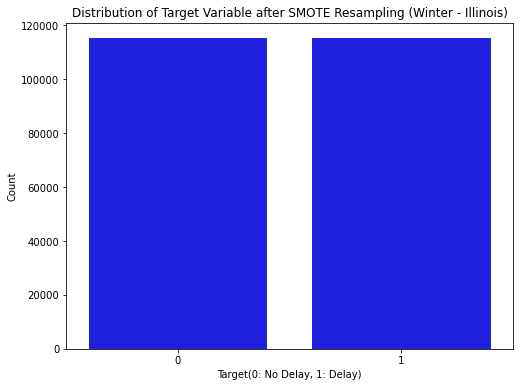

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=winter_il_train_res, color = 'blue')
plt.title('Distribution of Target Variable after SMOTE Resampling (Winter - Illinois)')
plt.xlabel('Target(0: No Delay, 1: Delay)')
plt.ylabel('Count')
plt.show()

## Winter (January) Weather data only for IL data

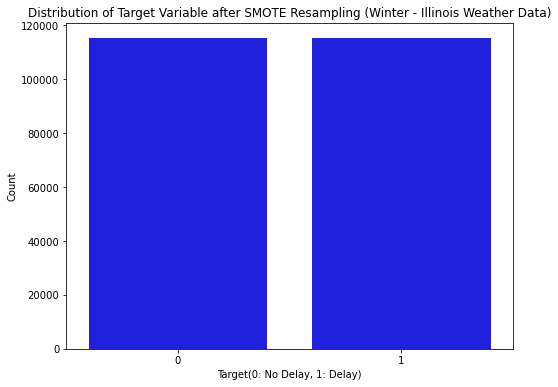

In [66]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=winter_il_weather_train_res, color = 'blue')
plt.title('Distribution of Target Variable after SMOTE Resampling (Winter - Illinois Weather Data)')
plt.xlabel('Target(0: No Delay, 1: Delay)')
plt.ylabel('Count')
plt.show()

In [67]:


model_winter_weather_IL = DecisionTreeClassifier(
    max_depth=5,
    max_leaf_nodes=6,
    min_impurity_decrease=0.01,
    random_state=42
)


model_winter_weather_IL.fit(X_winter_il_weather_train_res, y_winter_il_weather_train_res)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=6,
                       min_impurity_decrease=0.01, random_state=42)

In [68]:
y_train_weather_pred = model_winter_weather_IL.predict(X_winter_il_weather_train_res)
print("Classification Report (Training Set - Weather Data):")
print(classification_report(y_winter_il_weather_train_res, y_train_weather_pred))

Classification Report (Training Set - Weather Data):
              precision    recall  f1-score   support

           0       0.65      0.51      0.57    115230
           1       0.60      0.73      0.66    115230

    accuracy                           0.62    230460
   macro avg       0.63      0.62      0.62    230460
weighted avg       0.63      0.62      0.62    230460



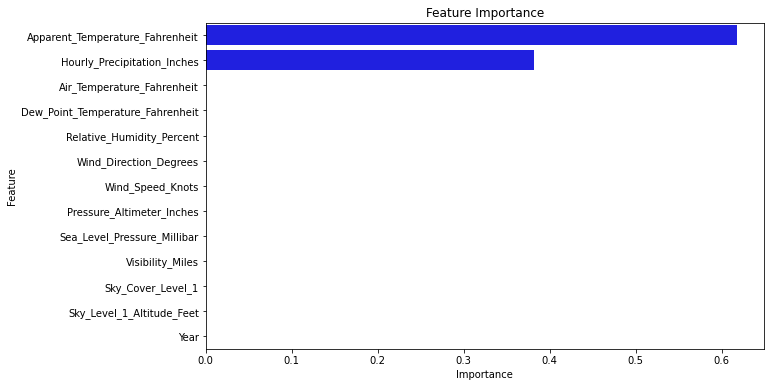

In [69]:


feature_importance = model_winter_weather_IL.feature_importances_


feature_importance_df = pd.DataFrame({
    'Feature': X_winter_il_weather_train_res.columns,
    'Importance': feature_importance
})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, color = 'blue')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### Validation data for Januray

In [70]:

X_winter_il_weather_val_res = winter_il_weather_val.drop(['Target', 'Year'], axis=1)  # Drop 'Target' and 'Year'
y_winter_il_weather_val_res = winter_il_weather_val['Target']  # 'Target' column as the label


model_winter_weather_IL_val = DecisionTreeClassifier(
    max_depth=5,
    max_leaf_nodes=6,
    min_impurity_decrease=0.01,
    random_state=42
)


model_winter_weather_IL_val.fit(X_winter_il_weather_val_res, y_winter_il_weather_val_res)


DecisionTreeClassifier(max_depth=5, max_leaf_nodes=6,
                       min_impurity_decrease=0.01, random_state=42)

In [71]:


# Make predictions on the validation data
y_pred_winter_il_weather_val_res = model_winter_weather_IL_val.predict(X_winter_il_weather_val_res)

# Generate the classification report with zero_division handling
report = classification_report(
    y_winter_il_weather_val_res, 
    y_pred_winter_il_weather_val_res,
    zero_division=0  # Set to 0 or 1 depending on your preference
)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.82      1.00      0.90     47010
           1       0.00      0.00      0.00     10370

    accuracy                           0.82     57380
   macro avg       0.41      0.50      0.45     57380
weighted avg       0.67      0.82      0.74     57380



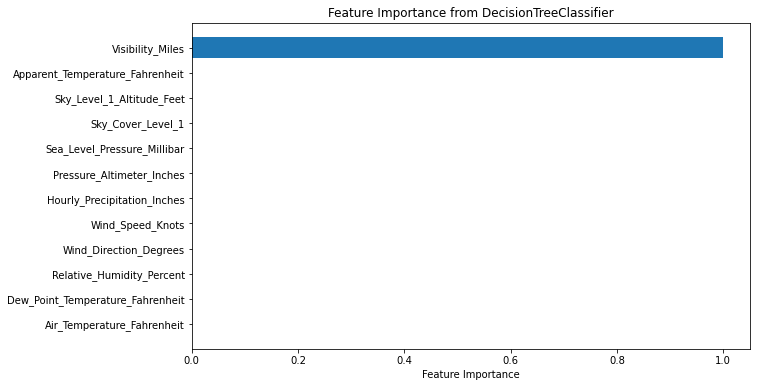

In [72]:
feature_importances = model_winter_weather_IL_val.feature_importances_

feature_names = X_winter_il_weather_val_res.columns


feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)


plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance from DecisionTreeClassifier')
plt.show()

## testing data

In [73]:
X_winter_il_weather_test_res = winter_il_weather_test.drop(['Target', 'Year'], axis=1)  # Drop 'Target' and 'Year'
y_winter_il_weather_test_res = winter_il_weather_test['Target']  # 'Target' column as the label


model_winter_weather_IL_test = DecisionTreeClassifier(
    max_depth=5,
    max_leaf_nodes=6,
    min_impurity_decrease=0.01,
    random_state=42
)

model_winter_weather_IL_test.fit(X_winter_il_weather_test_res, y_winter_il_weather_test_res)


DecisionTreeClassifier(max_depth=5, max_leaf_nodes=6,
                       min_impurity_decrease=0.01, random_state=42)

In [74]:
y_pred_winter_il_weather_test_res = model_winter_weather_IL_test.predict(X_winter_il_weather_test_res)

report_test = classification_report(y_winter_il_weather_test_res, y_pred_winter_il_weather_test_res, zero_division=0)
print(report_test)

              precision    recall  f1-score   support

           0       0.76      0.98      0.85     18140
           1       0.77      0.19      0.31      7053

    accuracy                           0.76     25193
   macro avg       0.76      0.58      0.58     25193
weighted avg       0.76      0.76      0.70     25193



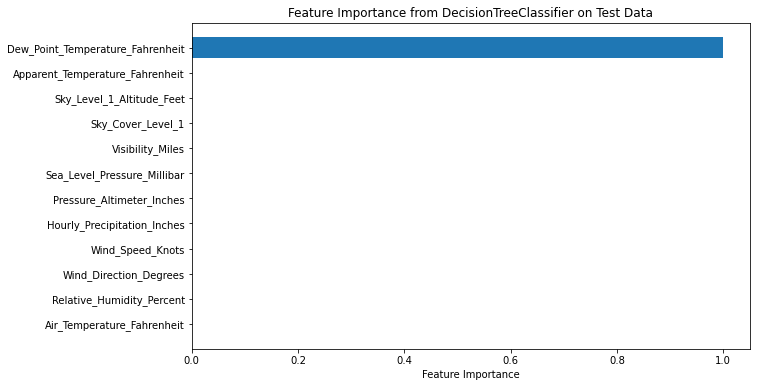

In [75]:
feature_importances_test = model_winter_weather_IL_test.feature_importances_

feature_names_test = X_winter_il_weather_test_res.columns

feature_importance_df_test = pd.DataFrame({
    'Feature': feature_names_test,
    'Importance': feature_importances_test
})

feature_importance_df_test = feature_importance_df_test.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_test['Feature'], feature_importance_df_test['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance from DecisionTreeClassifier on Test Data')
plt.show()

## Only flight data for Janurary IL data

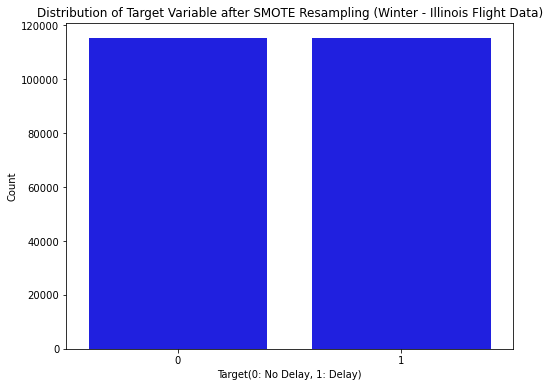

In [77]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=winter_il_flight_train_res, color = 'blue')
plt.title('Distribution of Target Variable after SMOTE Resampling (Winter - Illinois Flight Data)')
plt.xlabel('Target(0: No Delay, 1: Delay)')
plt.ylabel('Count')
plt.show()

In [79]:
X_winter_il_flight_train_res = winter_il_flight_train_res.drop(['Target'], axis=1)  
y_winter_il_flight_train_res = winter_il_flight_train_res['Target']  


model_winter_flight_IL = DecisionTreeClassifier(
    max_depth=5,
    max_leaf_nodes=6,
    min_impurity_decrease=0.01,
    random_state=42,
)
model_winter_flight_IL.fit(X_winter_il_flight_train_res, y_winter_il_flight_train_res)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=6,
                       min_impurity_decrease=0.01, random_state=42)

In [80]:
y_pred_winter_il_flight_train_res = model_winter_flight_IL.predict(X_winter_il_flight_train_res)


report_flight_train = classification_report(y_winter_il_flight_train_res, y_pred_winter_il_flight_train_res, zero_division=0)
print(report_flight_train)

              precision    recall  f1-score   support

           0       0.69      0.37      0.48    115230
           1       0.57      0.83      0.68    115230

    accuracy                           0.60    230460
   macro avg       0.63      0.60      0.58    230460
weighted avg       0.63      0.60      0.58    230460



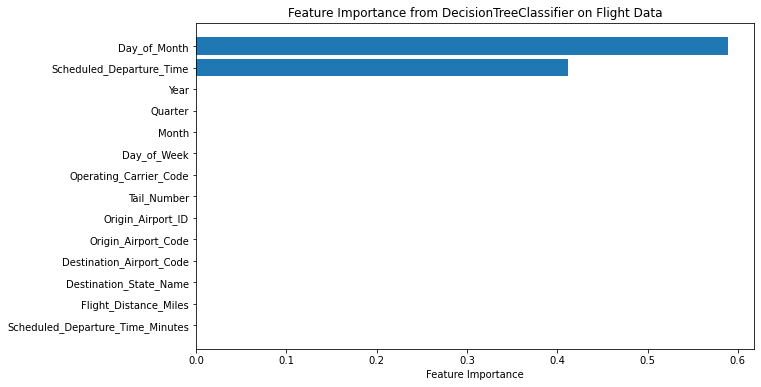

In [81]:
feature_importances_flight = model_winter_flight_IL.feature_importances_


feature_names_flight = X_winter_il_flight_train_res.columns
feature_importance_df_flight = pd.DataFrame({
    'Feature': feature_names_flight,
    'Importance': feature_importances_flight
})

feature_importance_df_flight = feature_importance_df_flight.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_flight['Feature'], feature_importance_df_flight['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance from DecisionTreeClassifier on Flight Data')
plt.gca().invert_yaxis()  # Invert the y-axis to ensure the highest importance is at the top
plt.show()

### validation data on flight info only

In [82]:
X_winter_il_flight_val_res = winter_il_flight_val.drop(['Target'], axis=1)  
y_winter_il_flight_val_res = winter_il_flight_val['Target']  


model_winter_flight_IL_val = DecisionTreeClassifier(
    max_depth=5,
    max_leaf_nodes=6,
    min_impurity_decrease=0.01,
    random_state=42
)

model_winter_flight_IL_val.fit(X_winter_il_flight_val_res, y_winter_il_flight_val_res)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=6,
                       min_impurity_decrease=0.01, random_state=42)

In [83]:
y_pred_winter_il_flight_val_res = model_winter_flight_IL_val.predict(X_winter_il_flight_val_res)

report_flight_val = classification_report(y_winter_il_flight_val_res, y_pred_winter_il_flight_val_res, zero_division=0)

print(report_flight_val)

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     47010
           1       0.00      0.00      0.00     10370

    accuracy                           0.82     57380
   macro avg       0.41      0.50      0.45     57380
weighted avg       0.67      0.82      0.74     57380



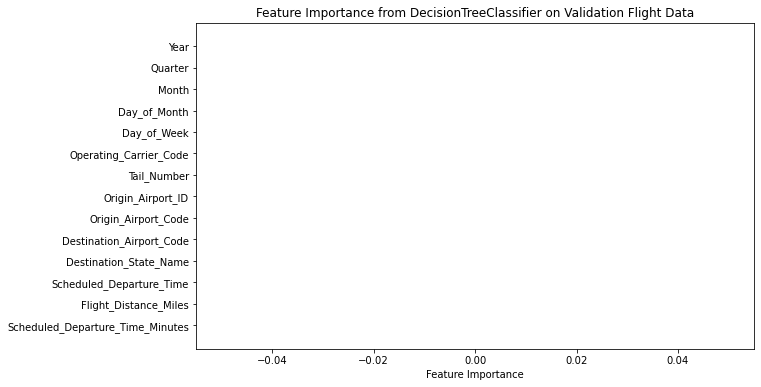

In [84]:
feature_importances_flight_val = model_winter_flight_IL_val.feature_importances_

feature_names_flight_val = X_winter_il_flight_val_res.columns


feature_importance_df_flight_val = pd.DataFrame({
    'Feature': feature_names_flight_val,
    'Importance': feature_importances_flight_val
})

feature_importance_df_flight_val = feature_importance_df_flight_val.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_flight_val['Feature'], feature_importance_df_flight_val['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance from DecisionTreeClassifier on Validation Flight Data')
plt.gca().invert_yaxis()  # Invert the y-axis to ensure the highest importance is at the top
plt.show()

## testing on only flight data

In [85]:
X_winter_il_flight_test_res = winter_il_flight_test.drop(['Target'], axis=1)  # Drop 'Target' column to get features
y_winter_il_flight_test_res = winter_il_flight_test['Target']  # 'Target' column as the label

model_winter_flight_IL_test = DecisionTreeClassifier(
    max_depth=5,
    max_leaf_nodes=6,
    min_impurity_decrease=0.01,
    random_state=42
)


model_winter_flight_IL_test.fit(X_winter_il_flight_test_res, y_winter_il_flight_test_res)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=6,
                       min_impurity_decrease=0.01, random_state=42)

In [86]:
y_pred_winter_il_flight_test_res = model_winter_flight_IL_test.predict(X_winter_il_flight_test_res)

report_flight_test = classification_report(y_winter_il_flight_test_res, y_pred_winter_il_flight_test_res, zero_division=0)

print(report_flight_test)


              precision    recall  f1-score   support

           0       0.78      0.95      0.86     18140
           1       0.70      0.31      0.43      7053

    accuracy                           0.77     25193
   macro avg       0.74      0.63      0.64     25193
weighted avg       0.76      0.77      0.74     25193



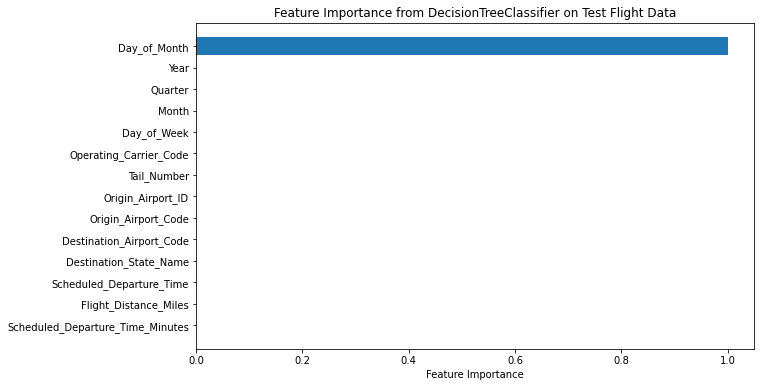

In [87]:
feature_importances_flight_test = model_winter_flight_IL_test.feature_importances_

feature_names_flight_test = X_winter_il_flight_test_res.columns


feature_importance_df_flight_test = pd.DataFrame({
    'Feature': feature_names_flight_test,
    'Importance': feature_importances_flight_test
})


feature_importance_df_flight_test = feature_importance_df_flight_test.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_flight_test['Feature'], feature_importance_df_flight_test['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance from DecisionTreeClassifier on Test Flight Data')
plt.gca().invert_yaxis()  # Invert the y-axis to ensure the highest importance is at the top
plt.show()

## combined data for winter IL

In [88]:
X_winter_il_train_combined_res = winter_il_train_res.drop(['Target'], axis=1)  # Drop 'Target' column to get features
y_winter_il_train_combined_res = winter_il_train_res['Target']  # 'Target' column as the label

model_winter_il_train_combined = DecisionTreeClassifier(
    max_depth=5,
    max_leaf_nodes=6,
    min_impurity_decrease=0.01,
    random_state=42
)

model_winter_il_train_combined.fit(X_winter_il_train_combined_res, y_winter_il_train_combined_res)


DecisionTreeClassifier(max_depth=5, max_leaf_nodes=6,
                       min_impurity_decrease=0.01, random_state=42)

In [89]:
y_pred_winter_il_train_combined_res = model_winter_il_train_combined.predict(X_winter_il_train_combined_res)

report_combined_train = classification_report(y_winter_il_train_combined_res, y_pred_winter_il_train_combined_res, zero_division=0)

print(report_combined_train)

              precision    recall  f1-score   support

           0       0.71      0.51      0.59    115230
           1       0.62      0.79      0.69    115230

    accuracy                           0.65    230460
   macro avg       0.66      0.65      0.64    230460
weighted avg       0.66      0.65      0.64    230460



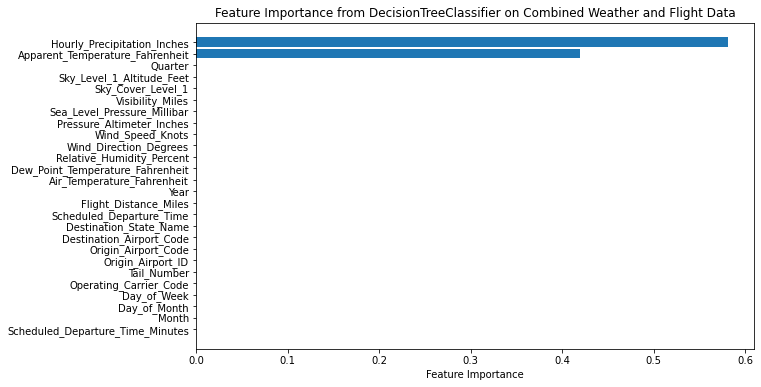

In [90]:
feature_importances_combined_train = model_winter_il_train_combined.feature_importances_


feature_names_combined_train = X_winter_il_train_combined_res.columns


feature_importance_df_combined_train = pd.DataFrame({
    'Feature': feature_names_combined_train,
    'Importance': feature_importances_combined_train
})


feature_importance_df_combined_train = feature_importance_df_combined_train.sort_values(by='Importance', ascending=False)



plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_combined_train['Feature'], feature_importance_df_combined_train['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance from DecisionTreeClassifier on Combined Weather and Flight Data')
plt.gca().invert_yaxis()  # Invert the y-axis to ensure the highest importance is at the top
plt.show()

## on validation

In [91]:
X_winter_il_val_res = winter_il_val.drop(['Target'], axis=1)  # Drop 'Target' column to get features
y_winter_il_val_res = winter_il_val['Target']  # 'Target' column as the label

model_winter_il_val = DecisionTreeClassifier(
    max_depth=5,
    max_leaf_nodes=6,
    min_impurity_decrease=0.01,
    random_state=42
)


model_winter_il_val.fit(X_winter_il_val_res, y_winter_il_val_res)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=6,
                       min_impurity_decrease=0.01, random_state=42)

In [92]:
y_pred_winter_il_val_res = model_winter_il_val.predict(X_winter_il_val_res)

report_val = classification_report(y_winter_il_val_res, y_pred_winter_il_val_res, zero_division=0)

print(report_val)


              precision    recall  f1-score   support

           0       0.82      1.00      0.90     47010
           1       0.00      0.00      0.00     10370

    accuracy                           0.82     57380
   macro avg       0.41      0.50      0.45     57380
weighted avg       0.67      0.82      0.74     57380



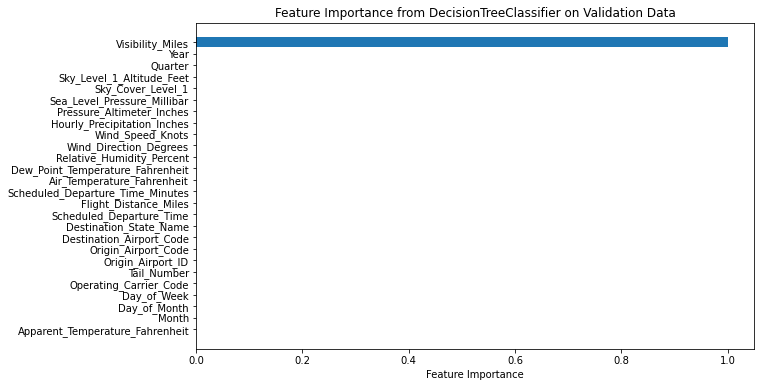

In [93]:
feature_importances_val = model_winter_il_val.feature_importances_


feature_names_val = X_winter_il_val_res.columns


feature_importance_df_val = pd.DataFrame({
    'Feature': feature_names_val,
    'Importance': feature_importances_val
})

feature_importance_df_val = feature_importance_df_val.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_val['Feature'], feature_importance_df_val['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance from DecisionTreeClassifier on Validation Data')
plt.gca().invert_yaxis()  # Invert the y-axis to ensure the highest importance is at the top
plt.show()

## testing on combined data for winter IL data

In [94]:
X_winter_il_flight_test_res = winter_il_flight_test.drop(['Target'], axis=1)  # Drop 'Target' column to get features
y_winter_il_flight_test_res = winter_il_flight_test['Target']  # 'Target' column as the label


model_winter_il_flight_test = DecisionTreeClassifier(
    max_depth=5,
    max_leaf_nodes=6,
    min_impurity_decrease=0.01,
    random_state=42
)


model_winter_il_flight_test.fit(X_winter_il_flight_test_res, y_winter_il_flight_test_res)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=6,
                       min_impurity_decrease=0.01, random_state=42)

In [95]:
y_pred_winter_il_flight_test_res = model_winter_il_flight_test.predict(X_winter_il_flight_test_res)

report_test = classification_report(y_winter_il_flight_test_res, y_pred_winter_il_flight_test_res, zero_division=0)

print(report_test)


              precision    recall  f1-score   support

           0       0.78      0.95      0.86     18140
           1       0.70      0.31      0.43      7053

    accuracy                           0.77     25193
   macro avg       0.74      0.63      0.64     25193
weighted avg       0.76      0.77      0.74     25193



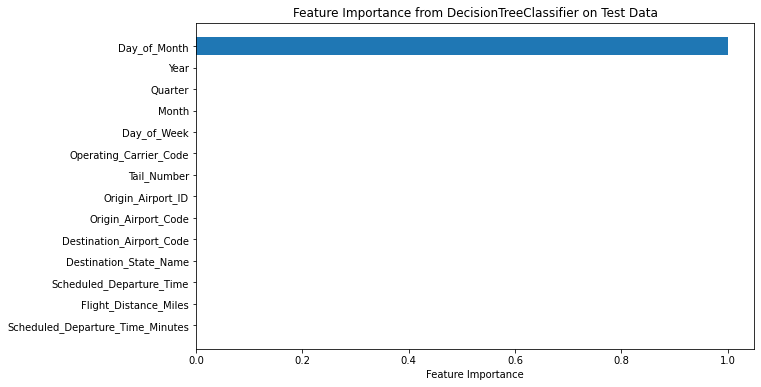

In [96]:
feature_importances_test = model_winter_il_flight_test.feature_importances_

feature_names_test = X_winter_il_flight_test_res.columns


feature_importance_df_test = pd.DataFrame({
    'Feature': feature_names_test,
    'Importance': feature_importances_test
})

feature_importance_df_test = feature_importance_df_test.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_test['Feature'], feature_importance_df_test['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance from DecisionTreeClassifier on Test Data')
plt.gca().invert_yaxis()  # Invert the y-axis to ensure the highest importance is at the top
plt.show()

# Models for spring (April) IL data

In [97]:

spring_il_train = spring_il[spring_il['Year'].isin(train_years)]
spring_il_val = spring_il[spring_il['Year'].isin(val_years)]
spring_il_test = spring_il[spring_il['Year'].isin(test_years)]

spring_il_flight_train = spring_il_flight[spring_il_flight['Year'].isin(train_years)]
spring_il_flight_val = spring_il_flight[spring_il_flight['Year'].isin(val_years)]
spring_il_flight_test = spring_il_flight[spring_il_flight['Year'].isin(test_years)]

spring_il_weather_train = spring_il_weather[spring_il_weather['Year'].isin(train_years)]
spring_il_weather_val = spring_il_weather[spring_il_weather['Year'].isin(val_years)]
spring_il_weather_test = spring_il_weather[spring_il_weather['Year'].isin(test_years)]



In [98]:


spring_il_train = spring_il_train.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
spring_il_val = spring_il_val.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
spring_il_test = spring_il_test.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)

spring_il_flight_train = spring_il_flight_train.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
spring_il_flight_val = spring_il_flight_val.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
spring_il_flight_test = spring_il_flight_test.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)

spring_il_weather_train = spring_il_weather_train.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
spring_il_weather_val = spring_il_weather_val.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
spring_il_weather_test = spring_il_weather_test.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)

In [99]:


smote = SMOTE(random_state=42)


X_spring_il_train = spring_il_train.drop('Target', axis=1)
y_spring_il_train = spring_il_train['Target']
X_spring_il_train_res, y_spring_il_train_res = smote.fit_resample(X_spring_il_train, y_spring_il_train)


X_spring_il_flight_train = spring_il_flight_train.drop('Target', axis=1)
y_spring_il_flight_train = spring_il_flight_train['Target']
X_spring_il_flight_train_res, y_spring_il_flight_train_res = smote.fit_resample(X_spring_il_flight_train, y_spring_il_flight_train)


X_spring_il_weather_train = spring_il_weather_train.drop('Target', axis=1)
y_spring_il_weather_train = spring_il_weather_train['Target']
X_spring_il_weather_train_res, y_spring_il_weather_train_res = smote.fit_resample(X_spring_il_weather_train, y_spring_il_weather_train)


spring_il_train_res = pd.concat([X_spring_il_train_res, y_spring_il_train_res], axis=1)
spring_il_flight_train_res = pd.concat([X_spring_il_flight_train_res, y_spring_il_flight_train_res], axis=1)
spring_il_weather_train_res = pd.concat([X_spring_il_weather_train_res, y_spring_il_weather_train_res], axis=1)



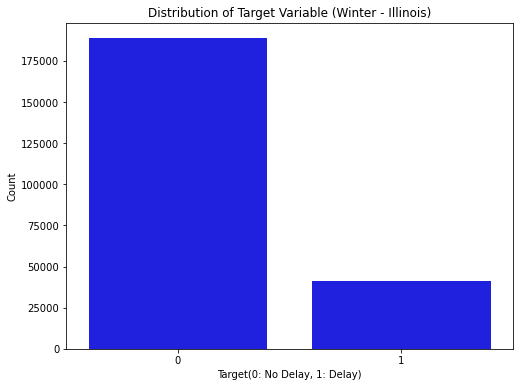

In [100]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=spring_il, color = 'blue')
plt.title('Distribution of Target Variable (Spring - Illinois)')
plt.xlabel('Target(0: No Delay, 1: Delay)')
plt.ylabel('Count')
plt.show()


### The Classes are imbalanced, we applied smote to solve this issue. Below is the plot after smote was applied

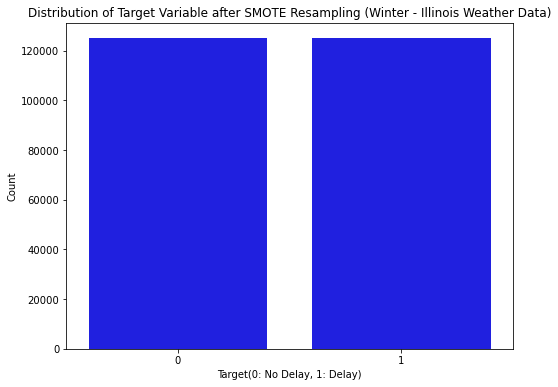

In [101]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=spring_il_weather_train_res, color = 'blue')
plt.title('Distribution of Target Variable after SMOTE Resampling (Winter - Illinois Weather Data)')
plt.xlabel('Target(0: No Delay, 1: Delay)')
plt.ylabel('Count')
plt.show()


## Models only using weather data for spring (IL data)

### Model on training data

In [102]:
model_spring_weather_IL = DecisionTreeClassifier(
    max_depth=5,
    max_leaf_nodes=6,
    min_impurity_decrease=0.01,
    random_state=42
)


model_spring_weather_IL.fit(X_spring_il_weather_train_res, y_spring_il_weather_train_res)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=6,
                       min_impurity_decrease=0.01, random_state=42)

In [103]:

y_train_weather_pred = model_spring_weather_IL.predict(X_spring_il_weather_train_res)


print("Classification Report (Training Set - Weather Data):")
print(classification_report(y_spring_il_weather_train_res, y_train_weather_pred))


Classification Report (Training Set - Weather Data):
              precision    recall  f1-score   support

           0       0.55      0.84      0.66    125061
           1       0.66      0.30      0.41    125061

    accuracy                           0.57    250122
   macro avg       0.60      0.57      0.54    250122
weighted avg       0.60      0.57      0.54    250122



## Model on validation

In [104]:

X_spring_il_weather_val_res = spring_il_weather_val.drop(['Target', 'Year'], axis=1)  # Drop 'Target' and 'Year'
y_spring_il_weather_val_res = spring_il_weather_val['Target']  # 'Target' column as the label


model_spring_weather_IL_val = DecisionTreeClassifier(
    max_depth=5,
    max_leaf_nodes=6,
    min_impurity_decrease=0.01,
    random_state=42
)


model_spring_weather_IL_val.fit(X_spring_il_weather_val_res, y_spring_il_weather_val_res)


DecisionTreeClassifier(max_depth=5, max_leaf_nodes=6,
                       min_impurity_decrease=0.01, random_state=42)

In [106]:

y_spring_il_weather_val_pred = model_spring_weather_IL_val.predict(X_spring_il_weather_val_res)

print("Classification Report (Validation Set - Weather Data):")
print(classification_report(y_spring_il_weather_val_res, y_spring_il_weather_val_pred, zero_division=1))


Classification Report (Validation Set - Weather Data):
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     41915
           1       1.00      0.00      0.00      3153

    accuracy                           0.93     45068
   macro avg       0.97      0.50      0.48     45068
weighted avg       0.93      0.93      0.90     45068



## Testing set

In [112]:

X_spring_il_weather_test_res = spring_il_weather_test.drop(['Target', 'Year'], axis=1)  # Drop 'Target' and 'Year'
y_spring_il_weather_test_res = spring_il_weather_test['Target']  # 'Target' column as the label


model_spring_weather_IL_test = DecisionTreeClassifier(
    max_depth=5,
    max_leaf_nodes=6,
    min_impurity_decrease=0.01,
    random_state=42
)

model_spring_weather_IL_test.fit(X_spring_il_weather_test_res, y_spring_il_weather_test_res)


DecisionTreeClassifier(max_depth=5, max_leaf_nodes=6,
                       min_impurity_decrease=0.01, random_state=42)

In [113]:

y_pred_spring_il_weather_test_res = model_spring_weather_IL_test.predict(X_spring_il_weather_test_res)

report_test = classification_report(y_spring_il_weather_test_res, y_pred_spring_il_weather_test_res, zero_division=0)
print(report_test)


              precision    recall  f1-score   support

           0       0.76      1.00      0.87     21857
           1       0.00      0.00      0.00      6727

    accuracy                           0.76     28584
   macro avg       0.38      0.50      0.43     28584
weighted avg       0.58      0.76      0.66     28584



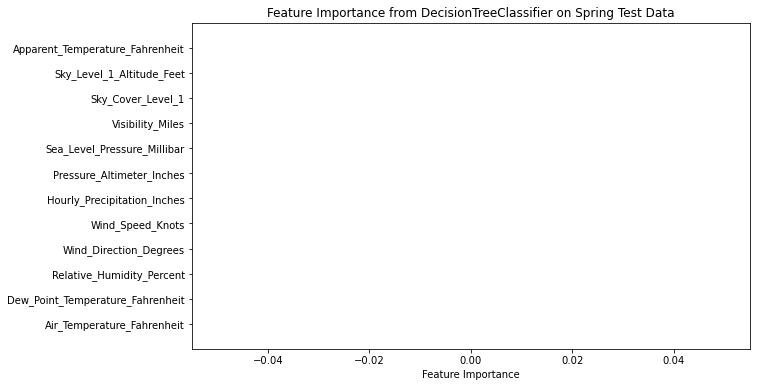

In [114]:



feature_importances_test = model_spring_weather_IL_test.feature_importances_


feature_names_test = X_spring_il_weather_test_res.columns


feature_importance_df_test = pd.DataFrame({
    'Feature': feature_names_test,
    'Importance': feature_importances_test
})


feature_importance_df_test = feature_importance_df_test.sort_values(by='Importance', ascending=True)


plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_test['Feature'], feature_importance_df_test['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance from DecisionTreeClassifier on Spring Test Data')
plt.show()


# Using flight data (spring data IL)

## Training

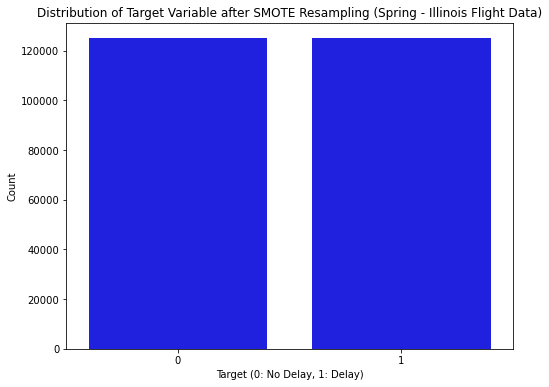

In [118]:

plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=spring_il_flight_train_res, color='blue')
plt.title('Distribution of Target Variable after SMOTE Resampling (Spring - Illinois Flight Data)')
plt.xlabel('Target (0: No Delay, 1: Delay)')
plt.ylabel('Count')
plt.show()


In [119]:

X_spring_il_flight_train_res = spring_il_flight_train_res.drop(['Target'], axis=1)
y_spring_il_flight_train_res = spring_il_flight_train_res['Target']


model_spring_flight_IL = DecisionTreeClassifier(
    max_depth=5,
    max_leaf_nodes=6,
    min_impurity_decrease=0.01,
    random_state=42,
)

model_spring_flight_IL.fit(X_spring_il_flight_train_res, y_spring_il_flight_train_res)


DecisionTreeClassifier(max_depth=5, max_leaf_nodes=6,
                       min_impurity_decrease=0.01, random_state=42)

In [120]:
y_pred_spring_il_flight_train_res = model_spring_flight_IL.predict(X_spring_il_flight_train_res)

report_flight_train = classification_report(y_spring_il_flight_train_res, y_pred_spring_il_flight_train_res, zero_division=0)
print(report_flight_train)

              precision    recall  f1-score   support

           0       0.63      0.36      0.46    125061
           1       0.55      0.79      0.65    125061

    accuracy                           0.57    250122
   macro avg       0.59      0.57      0.55    250122
weighted avg       0.59      0.57      0.55    250122



## Validation flight data only (IL data - spring)

In [121]:
from sklearn.tree import DecisionTreeClassifier


X_spring_il_flight_val_res = spring_il_flight_val.drop(['Target'], axis=1)
y_spring_il_flight_val_res = spring_il_flight_val['Target']


model_spring_flight_IL_val = DecisionTreeClassifier(
    max_depth=5,
    max_leaf_nodes=6,
    min_impurity_decrease=0.01,
    random_state=42
)

model_spring_flight_IL_val.fit(X_spring_il_flight_val_res, y_spring_il_flight_val_res)


DecisionTreeClassifier(max_depth=5, max_leaf_nodes=6,
                       min_impurity_decrease=0.01, random_state=42)

In [122]:
from sklearn.metrics import classification_report


y_pred_spring_il_flight_val_res = model_spring_flight_IL_val.predict(X_spring_il_flight_val_res)


report_flight_val = classification_report(y_spring_il_flight_val_res, y_pred_spring_il_flight_val_res, zero_division=0)

print(report_flight_val)


              precision    recall  f1-score   support

           0       0.93      1.00      0.96     41915
           1       0.00      0.00      0.00      3153

    accuracy                           0.93     45068
   macro avg       0.47      0.50      0.48     45068
weighted avg       0.86      0.93      0.90     45068



## Testing flight data only

In [129]:
from sklearn.tree import DecisionTreeClassifier

X_spring_il_flight_test_res = spring_il_flight_test.drop(['Target'], axis=1)  # Drop 'Target' column to get features
y_spring_il_flight_test_res = spring_il_flight_test['Target']  # 'Target' column as the label


model_spring_flight_IL_test = DecisionTreeClassifier(
    max_depth=5,
    max_leaf_nodes=6,
    min_impurity_decrease=0.01,
    random_state=42
)

model_spring_flight_IL_test.fit(X_spring_il_flight_test_res, y_spring_il_flight_test_res)


DecisionTreeClassifier(max_depth=5, max_leaf_nodes=6,
                       min_impurity_decrease=0.01, random_state=42)

In [130]:

y_pred_spring_il_flight_test_res = model_spring_flight_IL_test.predict(X_spring_il_flight_test_res)


report_flight_test = classification_report(y_spring_il_flight_test_res, y_pred_spring_il_flight_test_res, zero_division=0)


print(report_flight_test)


              precision    recall  f1-score   support

           0       0.76      1.00      0.87     21857
           1       0.00      0.00      0.00      6727

    accuracy                           0.76     28584
   macro avg       0.38      0.50      0.43     28584
weighted avg       0.58      0.76      0.66     28584



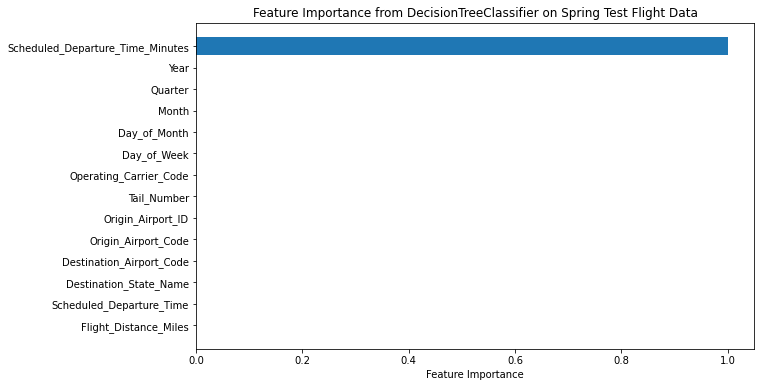

In [131]:


feature_importances_flight_test = model_spring_flight_IL_test.feature_importances_

feature_names_flight_test = X_spring_il_flight_test_res.columns


feature_importance_df_flight_test = pd.DataFrame({
    'Feature': feature_names_flight_test,
    'Importance': feature_importances_flight_test
})


feature_importance_df_flight_test = feature_importance_df_flight_test.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_flight_test['Feature'], feature_importance_df_flight_test['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance from DecisionTreeClassifier on Spring Test Flight Data')
plt.gca().invert_yaxis()  # Invert the y-axis to ensure the highest importance is at the top
plt.show()


## Model using combination of both weather and flight for spring data IL

## training data

In [132]:

X_spring_il_train_combined_res = spring_il_train_res.drop(['Target'], axis=1)  # Drop 'Target' column to get features
y_spring_il_train_combined_res = spring_il_train_res['Target']  # 'Target' column as the label


model_spring_il_train_combined = DecisionTreeClassifier(
    max_depth=5,
    max_leaf_nodes=6,
    min_impurity_decrease=0.01,
    random_state=42
)

model_spring_il_train_combined.fit(X_spring_il_train_combined_res, y_spring_il_train_combined_res)


DecisionTreeClassifier(max_depth=5, max_leaf_nodes=6,
                       min_impurity_decrease=0.01, random_state=42)

In [133]:



y_pred_spring_il_train_combined_res = model_spring_il_train_combined.predict(X_spring_il_train_combined_res)


report_combined_train = classification_report(y_spring_il_train_combined_res, y_pred_spring_il_train_combined_res, zero_division=0)


print(report_combined_train)


              precision    recall  f1-score   support

           0       0.57      0.84      0.68    125061
           1       0.70      0.37      0.48    125061

    accuracy                           0.61    250122
   macro avg       0.64      0.61      0.58    250122
weighted avg       0.64      0.61      0.58    250122



## validation

In [134]:
X_spring_il_val_res = spring_il_val.drop(['Target'], axis=1)
y_spring_il_val_res = spring_il_val['Target']

model_spring_il_val = DecisionTreeClassifier(
    max_depth=5,
    max_leaf_nodes=6,
    min_impurity_decrease=0.01,
    random_state=42
)

model_spring_il_val.fit(X_spring_il_val_res, y_spring_il_val_res)


DecisionTreeClassifier(max_depth=5, max_leaf_nodes=6,
                       min_impurity_decrease=0.01, random_state=42)

In [135]:
y_pred_spring_il_val_res = model_spring_il_val.predict(X_spring_il_val_res)

report_val = classification_report(y_spring_il_val_res, y_pred_spring_il_val_res, zero_division=0)

print(report_val)


              precision    recall  f1-score   support

           0       0.93      1.00      0.96     41915
           1       0.00      0.00      0.00      3153

    accuracy                           0.93     45068
   macro avg       0.47      0.50      0.48     45068
weighted avg       0.86      0.93      0.90     45068



## Testing data

In [136]:
X_spring_il_flight_test_res = spring_il_flight_test.drop(['Target'], axis=1)
y_spring_il_flight_test_res = spring_il_flight_test['Target']

model_spring_il_flight_test = DecisionTreeClassifier(
    max_depth=5,
    max_leaf_nodes=6,
    min_impurity_decrease=0.01,
    random_state=42
)

model_spring_il_flight_test.fit(X_spring_il_flight_test_res, y_spring_il_flight_test_res)


DecisionTreeClassifier(max_depth=5, max_leaf_nodes=6,
                       min_impurity_decrease=0.01, random_state=42)

In [137]:
y_pred_spring_il_flight_test_res = model_spring_il_flight_test.predict(X_spring_il_flight_test_res)

report_test = classification_report(y_spring_il_flight_test_res, y_pred_spring_il_flight_test_res, zero_division=0)

print(report_test)


              precision    recall  f1-score   support

           0       0.76      1.00      0.87     21857
           1       0.00      0.00      0.00      6727

    accuracy                           0.76     28584
   macro avg       0.38      0.50      0.43     28584
weighted avg       0.58      0.76      0.66     28584



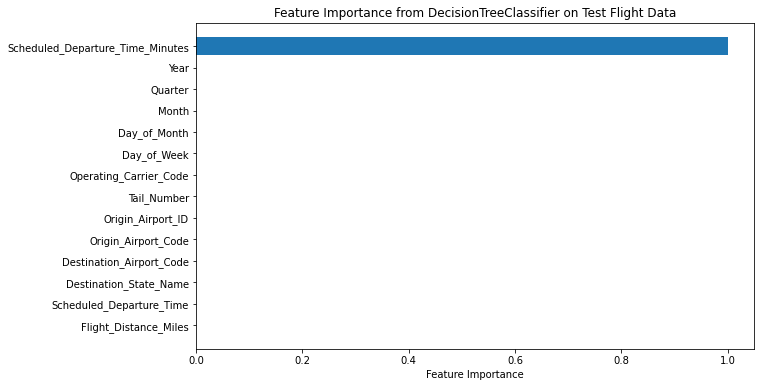

In [138]:
feature_importances_flight_test = model_spring_il_flight_test.feature_importances_

feature_names_flight_test = X_spring_il_flight_test_res.columns

feature_importance_df_flight_test = pd.DataFrame({
    'Feature': feature_names_flight_test,
    'Importance': feature_importances_flight_test
})

feature_importance_df_flight_test = feature_importance_df_flight_test.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_flight_test['Feature'], feature_importance_df_flight_test['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance from DecisionTreeClassifier on Test Flight Data')
plt.gca().invert_yaxis()
plt.show()


# All Models for July IL

In [146]:
summer_il_train = summer_il[summer_il['Year'].isin(train_years)]
summer_il_val = summer_il[summer_il['Year'].isin(val_years)]
summer_il_test = summer_il[summer_il['Year'].isin(test_years)]

summer_il_flight_train = summer_il_flight[summer_il_flight['Year'].isin(train_years)]
summer_il_flight_val = summer_il_flight[summer_il_flight['Year'].isin(val_years)]
summer_il_flight_test = summer_il_flight[summer_il_flight['Year'].isin(test_years)]

summer_il_weather_train = summer_il_weather[summer_il_weather['Year'].isin(train_years)]
summer_il_weather_val = summer_il_weather[summer_il_weather['Year'].isin(val_years)]
summer_il_weather_test = summer_il_weather[summer_il_weather['Year'].isin(test_years)]


In [147]:
summer_il_train = summer_il_train.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
summer_il_val = summer_il_val.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
summer_il_test = summer_il_test.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)

summer_il_flight_train = summer_il_flight_train.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
summer_il_flight_val = summer_il_flight_val.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
summer_il_flight_test = summer_il_flight_test.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)

summer_il_weather_train = summer_il_weather_train.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
summer_il_weather_val = summer_il_weather_val.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
summer_il_weather_test = summer_il_weather_test.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)


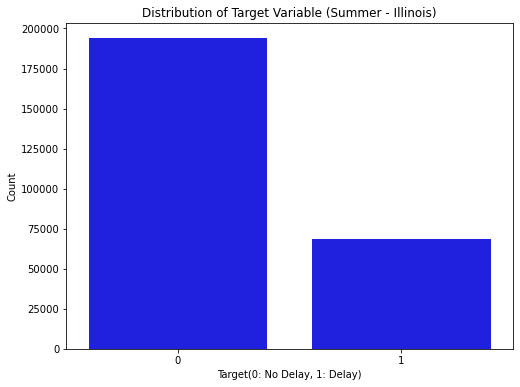

In [148]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=summer_il, color='blue')
plt.title('Distribution of Target Variable (Summer - Illinois)')
plt.xlabel('Target(0: No Delay, 1: Delay)')
plt.ylabel('Count')
plt.show()

In [150]:
smote = SMOTE(random_state=42)

X_summer_il_train = summer_il_train.drop('Target', axis=1)
y_summer_il_train = summer_il_train['Target']
X_summer_il_train_res, y_summer_il_train_res = smote.fit_resample(X_summer_il_train, y_summer_il_train)

X_summer_il_flight_train = summer_il_flight_train.drop('Target', axis=1)
y_summer_il_flight_train = summer_il_flight_train['Target']
X_summer_il_flight_train_res, y_summer_il_flight_train_res = smote.fit_resample(X_summer_il_flight_train, y_summer_il_flight_train)

X_summer_il_weather_train = summer_il_weather_train.drop('Target', axis=1)
y_summer_il_weather_train = summer_il_weather_train['Target']
X_summer_il_weather_train_res, y_summer_il_weather_train_res = smote.fit_resample(X_summer_il_weather_train, y_summer_il_weather_train)

summer_il_train_res = pd.concat([X_summer_il_train_res, y_summer_il_train_res], axis=1)
summer_il_flight_train_res = pd.concat([X_summer_il_flight_train_res, y_summer_il_flight_train_res], axis=1)
summer_il_weather_train_res = pd.concat([X_summer_il_weather_train_res, y_summer_il_weather_train_res], axis=1)


## Only using weather data

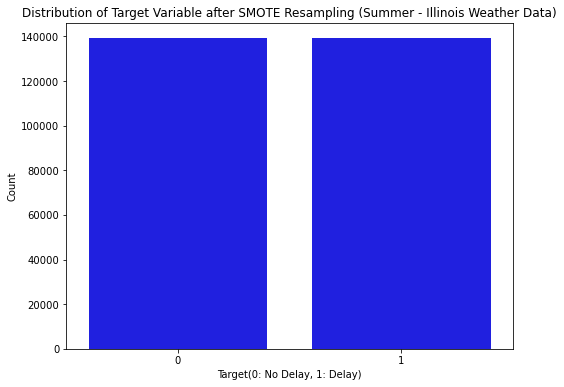

In [151]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=summer_il_weather_train_res, color='blue')
plt.title('Distribution of Target Variable after SMOTE Resampling (Summer - Illinois Weather Data)')
plt.xlabel('Target(0: No Delay, 1: Delay)')
plt.ylabel('Count')
plt.show()


In [152]:
model_summer_weather_IL = DecisionTreeClassifier(
    max_depth=5,
    max_leaf_nodes=6,
    min_impurity_decrease=0.01,
    random_state=42
)

model_summer_weather_IL.fit(X_summer_il_weather_train_res, y_summer_il_weather_train_res)


DecisionTreeClassifier(max_depth=5, max_leaf_nodes=6,
                       min_impurity_decrease=0.01, random_state=42)

In [154]:
y_train_weather_pred = model_summer_weather_IL.predict(X_summer_il_weather_train_res)
print("Classification Report (Training Set - Weather Data):")
print(classification_report(y_summer_il_weather_train_res, y_train_weather_pred, zero_division = 1))


Classification Report (Training Set - Weather Data):
              precision    recall  f1-score   support

           0       0.50      1.00      0.67    139225
           1       1.00      0.00      0.00    139225

    accuracy                           0.50    278450
   macro avg       0.75      0.50      0.33    278450
weighted avg       0.75      0.50      0.33    278450



## validation

In [157]:
X_summer_il_weather_val_res = summer_il_weather_val.drop(['Target', 'Year'], axis=1)  # Drop 'Target' and 'Year'
y_summer_il_weather_val_res = summer_il_weather_val['Target']  # 'Target' column as the label

model_summer_weather_IL_val = DecisionTreeClassifier(
    max_depth=5,
    max_leaf_nodes=6,
    min_impurity_decrease=0.01,
    random_state=42
)

model_summer_weather_IL_val.fit(X_summer_il_weather_val_res, y_summer_il_weather_val_res)


DecisionTreeClassifier(max_depth=5, max_leaf_nodes=6,
                       min_impurity_decrease=0.01, random_state=42)

In [158]:
y_pred_summer_il_weather_val_res = model_summer_weather_IL_val.predict(X_summer_il_weather_val_res)

report_summer_val = classification_report(y_summer_il_weather_val_res, y_pred_summer_il_weather_val_res, zero_division=0)

print(report_summer_val)


              precision    recall  f1-score   support

           0       0.85      1.00      0.92     34392
           1       0.00      0.00      0.00      5880

    accuracy                           0.85     40272
   macro avg       0.43      0.50      0.46     40272
weighted avg       0.73      0.85      0.79     40272



## Testing data

In [159]:
X_summer_il_weather_test_res = summer_il_weather_test.drop(['Target', 'Year'], axis=1)  # Drop 'Target' and 'Year'
y_summer_il_weather_test_res = summer_il_weather_test['Target']  # 'Target' column as the label

model_summer_weather_IL_test = DecisionTreeClassifier(
    max_depth=5,
    max_leaf_nodes=6,
    min_impurity_decrease=0.01,
    random_state=42
)

model_summer_weather_IL_test.fit(X_summer_il_weather_test_res, y_summer_il_weather_test_res)


DecisionTreeClassifier(max_depth=5, max_leaf_nodes=6,
                       min_impurity_decrease=0.01, random_state=42)

In [160]:
y_pred_summer_il_weather_test_res = model_summer_weather_IL_test.predict(X_summer_il_weather_test_res)

report_test = classification_report(y_summer_il_weather_test_res, y_pred_summer_il_weather_test_res, zero_division=0)
print(report_test)


              precision    recall  f1-score   support

           0       0.66      1.00      0.79     20330
           1       0.00      0.00      0.00     10555

    accuracy                           0.66     30885
   macro avg       0.33      0.50      0.40     30885
weighted avg       0.43      0.66      0.52     30885



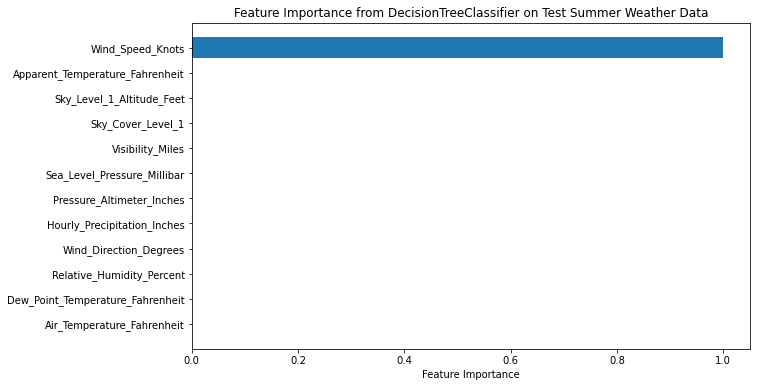

In [161]:
feature_importances_test = model_summer_weather_IL_test.feature_importances_

feature_names_test = X_summer_il_weather_test_res.columns

feature_importance_df_test = pd.DataFrame({
    'Feature': feature_names_test,
    'Importance': feature_importances_test
})

feature_importance_df_test = feature_importance_df_test.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_test['Feature'], feature_importance_df_test['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance from DecisionTreeClassifier on Test Summer Weather Data')
plt.show()


# Using flight data only for Summer data in IL

## training data

In [162]:
X_summer_il_flight_train_res = summer_il_flight_train_res.drop(['Target'], axis=1)  
y_summer_il_flight_train_res = summer_il_flight_train_res['Target']  

model_summer_flight_IL = DecisionTreeClassifier(
    max_depth=5,
    max_leaf_nodes=6,
    min_impurity_decrease=0.01,
    random_state=42,
)
model_summer_flight_IL.fit(X_summer_il_flight_train_res, y_summer_il_flight_train_res)


DecisionTreeClassifier(max_depth=5, max_leaf_nodes=6,
                       min_impurity_decrease=0.01, random_state=42)

In [163]:
y_pred_summer_il_flight_train_res = model_summer_flight_IL.predict(X_summer_il_flight_train_res)

report_flight_train = classification_report(y_summer_il_flight_train_res, y_pred_summer_il_flight_train_res, zero_division=0)
print(report_flight_train)


              precision    recall  f1-score   support

           0       0.64      0.50      0.56    139225
           1       0.59      0.72      0.65    139225

    accuracy                           0.61    278450
   macro avg       0.62      0.61      0.61    278450
weighted avg       0.62      0.61      0.61    278450



## validation data

In [164]:
X_summer_il_flight_val_res = summer_il_flight_val.drop(['Target'], axis=1)  
y_summer_il_flight_val_res = summer_il_flight_val['Target']  

model_summer_flight_IL_val = DecisionTreeClassifier(
    max_depth=5,
    max_leaf_nodes=6,
    min_impurity_decrease=0.01,
    random_state=42
)

model_summer_flight_IL_val.fit(X_summer_il_flight_val_res, y_summer_il_flight_val_res)


DecisionTreeClassifier(max_depth=5, max_leaf_nodes=6,
                       min_impurity_decrease=0.01, random_state=42)

In [165]:
y_pred_summer_il_flight_val_res = model_summer_flight_IL_val.predict(X_summer_il_flight_val_res)

report_flight_val = classification_report(y_summer_il_flight_val_res, y_pred_summer_il_flight_val_res, zero_division=0)

print(report_flight_val)


              precision    recall  f1-score   support

           0       0.85      1.00      0.92     34392
           1       0.00      0.00      0.00      5880

    accuracy                           0.85     40272
   macro avg       0.43      0.50      0.46     40272
weighted avg       0.73      0.85      0.79     40272



## testing

In [179]:
X_summer_il_train_res = summer_il_train_res.drop(['Target'], axis=1)  # Drop 'Target' column to get features
y_summer_il_train_res = summer_il_train_res['Target']  # 'Target' column as the label

model_summer_il_train = DecisionTreeClassifier(
    max_depth=5,
    max_leaf_nodes=6,
    min_impurity_decrease=0.01,
    random_state=42
)

model_summer_il_train.fit(X_summer_il_train_res, y_summer_il_train_res)


y_pred_summer_il_train_res = model_summer_il_train.predict(X_summer_il_train_res)


report_train = classification_report(y_summer_il_train_res, y_pred_summer_il_train_res, zero_division=0)
print(report_train)


              precision    recall  f1-score   support

           0       0.65      0.50      0.57    139225
           1       0.59      0.72      0.65    139225

    accuracy                           0.61    278450
   macro avg       0.62      0.61      0.61    278450
weighted avg       0.62      0.61      0.61    278450



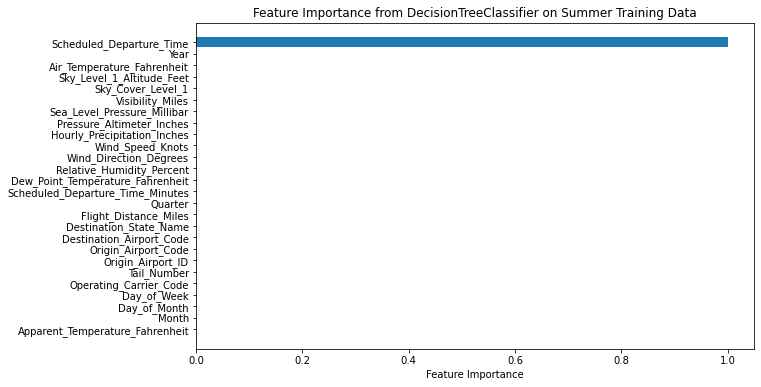

In [180]:

feature_importances_train = model_summer_il_train.feature_importances_

# Get the feature names (columns of the training data)
feature_names_train = X_summer_il_train_res.columns

# Create a DataFrame to hold feature names and importance
feature_importance_df_train = pd.DataFrame({
    'Feature': feature_names_train,
    'Importance': feature_importances_train
})

# Sort the features by importance (in descending order)
feature_importance_df_train = feature_importance_df_train.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_train['Feature'], feature_importance_df_train['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance from DecisionTreeClassifier on Summer Training Data')
plt.gca().invert_yaxis()  # Invert y-axis to ensure the most important features are at the top
plt.show()



## combined data for summer IL

In [181]:
X_summer_il_train_combined_res = summer_il_train_res.drop(['Target'], axis=1)  # Drop 'Target' column to get features
y_summer_il_train_combined_res = summer_il_train_res['Target']  # 'Target' column as the label

model_summer_il_train_combined = DecisionTreeClassifier(
    max_depth=5,
    max_leaf_nodes=6,
    min_impurity_decrease=0.01,
    random_state=42
)

model_summer_il_train_combined.fit(X_summer_il_train_combined_res, y_summer_il_train_combined_res)


DecisionTreeClassifier(max_depth=5, max_leaf_nodes=6,
                       min_impurity_decrease=0.01, random_state=42)

In [183]:
y_pred_summer_il_train_combined_res = model_summer_il_train_combined.predict(X_summer_il_train_combined_res)

report_combined_train = classification_report(y_summer_il_train_combined_res, y_pred_summer_il_train_combined_res, zero_division=0)

print(report_combined_train)


              precision    recall  f1-score   support

           0       0.65      0.50      0.57    139225
           1       0.59      0.72      0.65    139225

    accuracy                           0.61    278450
   macro avg       0.62      0.61      0.61    278450
weighted avg       0.62      0.61      0.61    278450



## validation

In [184]:
X_summer_il_val_res = summer_il_val.drop(['Target'], axis=1)  # Drop 'Target' column to get features
y_summer_il_val_res = summer_il_val['Target']  # 'Target' column as the label

model_summer_il_val = DecisionTreeClassifier(
    max_depth=5,
    max_leaf_nodes=6,
    min_impurity_decrease=0.01,
    random_state=42
)

model_summer_il_val.fit(X_summer_il_val_res, y_summer_il_val_res)


DecisionTreeClassifier(max_depth=5, max_leaf_nodes=6,
                       min_impurity_decrease=0.01, random_state=42)

In [185]:
y_pred_summer_il_val_res = model_summer_il_val.predict(X_summer_il_val_res)

report_val = classification_report(y_summer_il_val_res, y_pred_summer_il_val_res, zero_division=0)

print(report_val)


              precision    recall  f1-score   support

           0       0.85      1.00      0.92     34392
           1       0.00      0.00      0.00      5880

    accuracy                           0.85     40272
   macro avg       0.43      0.50      0.46     40272
weighted avg       0.73      0.85      0.79     40272



## testing

In [190]:
X_summer_il_test_res = summer_il_test.drop(['Target'], axis=1)  # Drop 'Target' column to get features
y_summer_il_test_res = summer_il_test['Target']  # 'Target' column as the label

model_summer_il_combined_test = DecisionTreeClassifier(
    max_depth=5,
    max_leaf_nodes=6,
    min_impurity_decrease=0.01,
    random_state=42
)

model_summer_il_combined_test.fit(X_summer_il_test_res, y_summer_il_test_res)


DecisionTreeClassifier(max_depth=5, max_leaf_nodes=6,
                       min_impurity_decrease=0.01, random_state=42)

In [191]:

y_pred_summer_il_test_res = model_summer_il_combined_test.predict(X_summer_il_test_res)

report_summer_il_test = classification_report(y_summer_il_test_res, y_pred_summer_il_test_res, zero_division=0)

print(report_summer_il_test)


              precision    recall  f1-score   support

           0       0.66      1.00      0.79     20330
           1       0.00      0.00      0.00     10555

    accuracy                           0.66     30885
   macro avg       0.33      0.50      0.40     30885
weighted avg       0.43      0.66      0.52     30885



# All models for Fall (IL data set)

In [192]:
fall_il_train = fall_il[fall_il['Year'].isin(train_years)]
fall_il_val = fall_il[fall_il['Year'].isin(val_years)]
fall_il_test = fall_il[fall_il['Year'].isin(test_years)]

fall_il_flight_train = fall_il_flight[fall_il_flight['Year'].isin(train_years)]
fall_il_flight_val = fall_il_flight[fall_il_flight['Year'].isin(val_years)]
fall_il_flight_test = fall_il_flight[fall_il_flight['Year'].isin(test_years)]

fall_il_weather_train = fall_il_weather[fall_il_weather['Year'].isin(train_years)]
fall_il_weather_val = fall_il_weather[fall_il_weather['Year'].isin(val_years)]
fall_il_weather_test = fall_il_weather[fall_il_weather['Year'].isin(test_years)]

In [193]:
fall_il_train = fall_il_train.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
fall_il_val = fall_il_val.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
fall_il_test = fall_il_test.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)

fall_il_flight_train = fall_il_flight_train.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
fall_il_flight_val = fall_il_flight_val.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
fall_il_flight_test = fall_il_flight_test.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)

fall_il_weather_train = fall_il_weather_train.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
fall_il_weather_val = fall_il_weather_val.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
fall_il_weather_test = fall_il_weather_test.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)


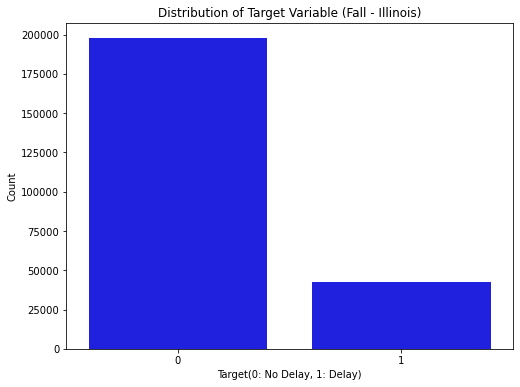

In [194]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=fall_il, color = 'blue')
plt.title('Distribution of Target Variable (Fall - Illinois)')
plt.xlabel('Target(0: No Delay, 1: Delay)')
plt.ylabel('Count')
plt.show()

In [196]:
smote = SMOTE(random_state=42)

X_fall_il_train = fall_il_train.drop('Target', axis=1)
y_fall_il_train = fall_il_train['Target']
X_fall_il_train_res, y_fall_il_train_res = smote.fit_resample(X_fall_il_train, y_fall_il_train)

X_fall_il_flight_train = fall_il_flight_train.drop('Target', axis=1)
y_fall_il_flight_train = fall_il_flight_train['Target']
X_fall_il_flight_train_res, y_fall_il_flight_train_res = smote.fit_resample(X_fall_il_flight_train, y_fall_il_flight_train)

X_fall_il_weather_train = fall_il_weather_train.drop('Target', axis=1)
y_fall_il_weather_train = fall_il_weather_train['Target']
X_fall_il_weather_train_res, y_fall_il_weather_train_res = smote.fit_resample(X_fall_il_weather_train, y_fall_il_weather_train)
fall_il_train_res = pd.concat([X_fall_il_train_res, y_fall_il_train_res], axis=1)
fall_il_flight_train_res = pd.concat([X_fall_il_flight_train_res, y_fall_il_flight_train_res], axis=1)
fall_il_weather_train_res = pd.concat([X_fall_il_weather_train_res, y_fall_il_weather_train_res], axis=1)


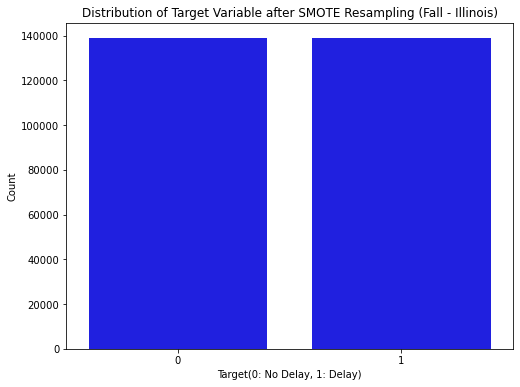

In [198]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=fall_il_train_res, color = 'blue')
plt.title('Distribution of Target Variable after SMOTE Resampling (Fall - Illinois)')
plt.xlabel('Target(0: No Delay, 1: Delay)')
plt.ylabel('Count')
plt.show()

# Using only weather data

In [199]:

model_fall_weather_IL = DecisionTreeClassifier(
    max_depth=5,
    max_leaf_nodes=6,
    min_impurity_decrease=0.01,
    random_state=42
)


model_fall_weather_IL.fit(X_fall_il_weather_train_res, y_fall_il_weather_train_res)


DecisionTreeClassifier(max_depth=5, max_leaf_nodes=6,
                       min_impurity_decrease=0.01, random_state=42)

In [200]:
y_train_weather_pred_fall = model_fall_weather_IL.predict(X_fall_il_weather_train_res)
print("Classification Report (Training Set - Weather Data - Fall):")
print(classification_report(y_fall_il_weather_train_res, y_train_weather_pred_fall))


Classification Report (Training Set - Weather Data - Fall):
              precision    recall  f1-score   support

           0       0.58      0.74      0.65    138923
           1       0.64      0.47      0.54    138923

    accuracy                           0.60    277846
   macro avg       0.61      0.60      0.59    277846
weighted avg       0.61      0.60      0.59    277846



## validation

In [201]:
X_fall_il_weather_val_res = fall_il_weather_val.drop(['Target', 'Year'], axis=1)  # Drop 'Target' and 'Year'
y_fall_il_weather_val_res = fall_il_weather_val['Target']  # 'Target' column as the label


model_fall_weather_IL_val = DecisionTreeClassifier(
    max_depth=5,
    max_leaf_nodes=6,
    min_impurity_decrease=0.01,
    random_state=42
)

model_fall_weather_IL_val.fit(X_fall_il_weather_val_res, y_fall_il_weather_val_res)


DecisionTreeClassifier(max_depth=5, max_leaf_nodes=6,
                       min_impurity_decrease=0.01, random_state=42)

In [202]:

y_pred_fall_il_weather_val_res = model_fall_weather_IL_val.predict(X_fall_il_weather_val_res)

report = classification_report(
    y_fall_il_weather_val_res, 
    y_pred_fall_il_weather_val_res,
    zero_division=0  
)

print(report)


              precision    recall  f1-score   support

           0       0.85      1.00      0.92     52413
           1       0.00      0.00      0.00      9423

    accuracy                           0.85     61836
   macro avg       0.42      0.50      0.46     61836
weighted avg       0.72      0.85      0.78     61836



# testing 

In [203]:
X_fall_il_weather_test_res = fall_il_weather_test.drop(['Target', 'Year'], axis=1)  # Drop 'Target' and 'Year'
y_fall_il_weather_test_res = fall_il_weather_test['Target']  # 'Target' column as the label

model_fall_weather_IL_test = DecisionTreeClassifier(
    max_depth=5,
    max_leaf_nodes=6,
    min_impurity_decrease=0.01,
    random_state=42
)

model_fall_weather_IL_test.fit(X_fall_il_weather_test_res, y_fall_il_weather_test_res)


DecisionTreeClassifier(max_depth=5, max_leaf_nodes=6,
                       min_impurity_decrease=0.01, random_state=42)

In [204]:
y_pred_fall_il_weather_test_res = model_fall_weather_IL_test.predict(X_fall_il_weather_test_res)

report_test = classification_report(y_fall_il_weather_test_res, y_pred_fall_il_weather_test_res, zero_division=0)
print(report_test)


              precision    recall  f1-score   support

           0       0.84      1.00      0.91      6339
           1       0.00      0.00      0.00      1192

    accuracy                           0.84      7531
   macro avg       0.42      0.50      0.46      7531
weighted avg       0.71      0.84      0.77      7531



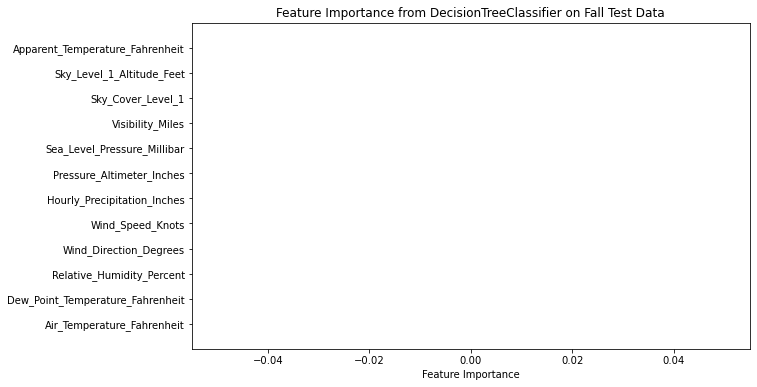

In [205]:
feature_importances_fall_test = model_fall_weather_IL_test.feature_importances_

feature_names_fall_test = X_fall_il_weather_test_res.columns

feature_importance_df_fall_test = pd.DataFrame({
    'Feature': feature_names_fall_test,
    'Importance': feature_importances_fall_test
})

feature_importance_df_fall_test = feature_importance_df_fall_test.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_fall_test['Feature'], feature_importance_df_fall_test['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance from DecisionTreeClassifier on Fall Test Data')
plt.show()


# Using only flight data

## training 

In [206]:
X_fall_il_flight_train_res = fall_il_flight_train_res.drop(['Target'], axis=1)  
y_fall_il_flight_train_res = fall_il_flight_train_res['Target']  

model_fall_flight_IL = DecisionTreeClassifier(
    max_depth=5,
    max_leaf_nodes=6,
    min_impurity_decrease=0.01,
    random_state=42,
)

model_fall_flight_IL.fit(X_fall_il_flight_train_res, y_fall_il_flight_train_res)


DecisionTreeClassifier(max_depth=5, max_leaf_nodes=6,
                       min_impurity_decrease=0.01, random_state=42)

In [207]:
y_pred_fall_il_flight_train_res = model_fall_flight_IL.predict(X_fall_il_flight_train_res)

report_flight_train = classification_report(y_fall_il_flight_train_res, y_pred_fall_il_flight_train_res, zero_division=0)
print(report_flight_train)


              precision    recall  f1-score   support

           0       0.55      0.94      0.69    138923
           1       0.79      0.24      0.37    138923

    accuracy                           0.59    277846
   macro avg       0.67      0.59      0.53    277846
weighted avg       0.67      0.59      0.53    277846



# validation

In [208]:
X_fall_il_flight_val_res = fall_il_flight_val.drop(['Target'], axis=1)
y_fall_il_flight_val_res = fall_il_flight_val['Target']

model_fall_flight_IL_val = DecisionTreeClassifier(
    max_depth=5,
    max_leaf_nodes=6,
    min_impurity_decrease=0.01,
    random_state=42
)

model_fall_flight_IL_val.fit(X_fall_il_flight_val_res, y_fall_il_flight_val_res)


DecisionTreeClassifier(max_depth=5, max_leaf_nodes=6,
                       min_impurity_decrease=0.01, random_state=42)

In [209]:
y_pred_fall_il_flight_val_res = model_fall_flight_IL_val.predict(X_fall_il_flight_val_res)

report_flight_val = classification_report(y_fall_il_flight_val_res, y_pred_fall_il_flight_val_res, zero_division=0)

print(report_flight_val)


              precision    recall  f1-score   support

           0       0.85      1.00      0.92     52413
           1       0.00      0.00      0.00      9423

    accuracy                           0.85     61836
   macro avg       0.42      0.50      0.46     61836
weighted avg       0.72      0.85      0.78     61836



# testing 

In [210]:
X_fall_il_flight_test_res = fall_il_flight_test.drop(['Target'], axis=1)  # Drop 'Target' column to get features
y_fall_il_flight_test_res = fall_il_flight_test['Target']  # 'Target' column as the label

model_fall_flight_IL_test = DecisionTreeClassifier(
    max_depth=5,
    max_leaf_nodes=6,
    min_impurity_decrease=0.01,
    random_state=42
)

model_fall_flight_IL_test.fit(X_fall_il_flight_test_res, y_fall_il_flight_test_res)


DecisionTreeClassifier(max_depth=5, max_leaf_nodes=6,
                       min_impurity_decrease=0.01, random_state=42)

In [211]:
y_pred_fall_il_flight_test_res = model_fall_flight_IL_test.predict(X_fall_il_flight_test_res)

report_flight_test = classification_report(y_fall_il_flight_test_res, y_pred_fall_il_flight_test_res, zero_division=0)

print(report_flight_test)


              precision    recall  f1-score   support

           0       0.84      1.00      0.91      6339
           1       0.00      0.00      0.00      1192

    accuracy                           0.84      7531
   macro avg       0.42      0.50      0.46      7531
weighted avg       0.71      0.84      0.77      7531



## using both weather and flight data

In [212]:
X_fall_il_train_combined_res = fall_il_train_res.drop(['Target'], axis=1)  # Drop 'Target' column to get features
y_fall_il_train_combined_res = fall_il_train_res['Target']  # 'Target' column as the label

model_fall_il_train_combined = DecisionTreeClassifier(
    max_depth=5,
    max_leaf_nodes=6,
    min_impurity_decrease=0.01,
    random_state=42
)

model_fall_il_train_combined.fit(X_fall_il_train_combined_res, y_fall_il_train_combined_res)


DecisionTreeClassifier(max_depth=5, max_leaf_nodes=6,
                       min_impurity_decrease=0.01, random_state=42)

In [213]:
y_pred_fall_il_train_combined_res = model_fall_il_train_combined.predict(X_fall_il_train_combined_res)

report_combined_train_fall = classification_report(y_fall_il_train_combined_res, y_pred_fall_il_train_combined_res, zero_division=0)

print(report_combined_train_fall)


              precision    recall  f1-score   support

           0       0.60      0.85      0.70    138923
           1       0.74      0.44      0.55    138923

    accuracy                           0.64    277846
   macro avg       0.67      0.64      0.63    277846
weighted avg       0.67      0.64      0.63    277846



## validation data

In [214]:
X_fall_il_val_res = fall_il_val.drop(['Target'], axis=1)  # Drop 'Target' column to get features
y_fall_il_val_res = fall_il_val['Target']  # 'Target' column as the label

model_fall_il_val = DecisionTreeClassifier(
    max_depth=5,
    max_leaf_nodes=6,
    min_impurity_decrease=0.01,
    random_state=42
)

model_fall_il_val.fit(X_fall_il_val_res, y_fall_il_val_res)


DecisionTreeClassifier(max_depth=5, max_leaf_nodes=6,
                       min_impurity_decrease=0.01, random_state=42)

In [215]:
y_pred_fall_il_val_res = model_fall_il_val.predict(X_fall_il_val_res)

report_val = classification_report(y_fall_il_val_res, y_pred_fall_il_val_res, zero_division=0)

print(report_val)


              precision    recall  f1-score   support

           0       0.85      1.00      0.92     52413
           1       0.00      0.00      0.00      9423

    accuracy                           0.85     61836
   macro avg       0.42      0.50      0.46     61836
weighted avg       0.72      0.85      0.78     61836



## testing 

In [216]:
X_fall_il_train_res = fall_il_train.drop(['Target'], axis=1)  # Drop 'Target' column to get features
y_fall_il_train_res = fall_il_train['Target']  # 'Target' column as the label

model_fall_il_test = DecisionTreeClassifier(
    max_depth=5,
    max_leaf_nodes=6,
    min_impurity_decrease=0.01,
    random_state=42
)

model_fall_il_test.fit(X_fall_il_train_res, y_fall_il_train_res)


DecisionTreeClassifier(max_depth=5, max_leaf_nodes=6,
                       min_impurity_decrease=0.01, random_state=42)

In [220]:
X_fall_il_test_res = fall_il_test.drop(['Target'], axis=1)  # Drop 'Target' column to get features
y_fall_il_test_res = fall_il_test['Target']  # 'Target' column as the label


y_pred_fall_il_test_res = model_fall_il_test.predict(X_fall_il_test_res)

# Generate the classification report with zero_division handling
report_test = classification_report(y_fall_il_test_res, y_pred_fall_il_test_res, zero_division=0)

# Print the classification report
print(report_test)

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      6339
           1       0.00      0.00      0.00      1192

    accuracy                           0.84      7531
   macro avg       0.42      0.50      0.46      7531
weighted avg       0.71      0.84      0.77      7531



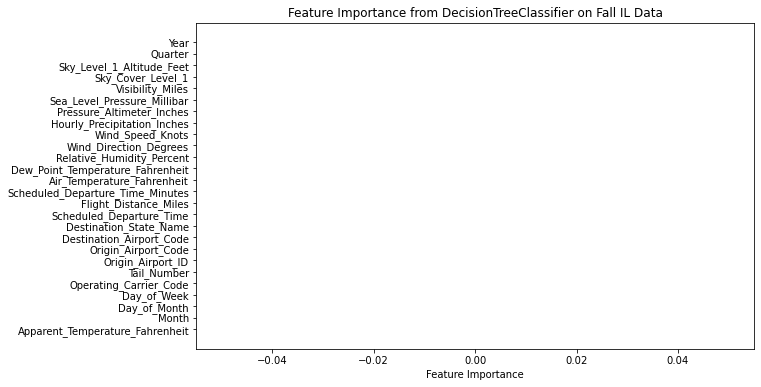

In [221]:
# Get the feature importances from the trained model
feature_importances_fall = model_fall_il_test.feature_importances_

# Get the feature names from the dataset (excluding 'Target' column)
feature_names_fall = X_fall_il_test_res.columns

# Create a DataFrame to hold feature names and their corresponding importance
feature_importance_df_fall = pd.DataFrame({
    'Feature': feature_names_fall,
    'Importance': feature_importances_fall
})

# Sort the features by importance in descending order
feature_importance_df_fall = feature_importance_df_fall.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_fall['Feature'], feature_importance_df_fall['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance from DecisionTreeClassifier on Fall IL Data')
plt.gca().invert_yaxis()  # Invert the y-axis to ensure the most important feature is at the top
plt.show()


## This model is for Flights and Weather Data combined

In [ ]:
# Separate features and target
X_train = train_df.drop('Target', axis=1)
y_train = train_df['Target']
X_val = val_df.drop('Target', axis=1)
y_val = val_df['Target']
X_test = test_df.drop('Target', axis=1)
y_test = test_df['Target']

In [ ]:
X_train.head()

In [ ]:
X_train.info()

In [ ]:
# Ensure consistent encoding across all sets using pd.Categorical
for col in X_train.select_dtypes(include=['category']).columns:
    X_train[col] = pd.Categorical(X_train[col])
    X_val[col] = pd.Categorical(X_val[col], categories=X_train[col].cat.categories)
    X_test[col] = pd.Categorical(X_test[col], categories=X_train[col].cat.categories)

# Convert categorical columns to integer codes
X_train = X_train.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
X_val = X_val.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
X_test = X_test.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)

In [ ]:
counts_1 = pd.Series(train_df["Target"]).value_counts()
class_counts_df_1 = counts_1.reset_index()
class_counts_df_1.columns = ['Class', 'Count']
sns.barplot(x='Class', y='Count', data=class_counts_df_1)

Based on this bar plot we can see the unbalanced distribution between the two different classes. Therefore, we need to apply SMOTE for class balancing.

In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
counts_2 = pd.Series(y_train_smote).value_counts()
class_counts_df_2 = counts_2.reset_index()
class_counts_df_2.columns = ['Class', 'Count']
sns.barplot(x='Class', y='Count', data=class_counts_df_2)

The classes are balanced, we are ready to train the decision tree!

In [ ]:
jan_clf_1 = DecisionTreeClassifier(
    max_depth=5,
    max_leaf_nodes=6,
    min_impurity_decrease=0.01,
    random_state=42
)
jan_clf_1.fit(X_train_smote, y_train_smote)

In [ ]:
y_train_pred = jan_clf_1.predict(X_train_smote)
accuracy_training = round(accuracy_score(y_train_smote, y_train_pred), 2)
print("The accuracy for the training set is :" , accuracy_training)


In [ ]:
cm_training = confusion_matrix(y_train_smote, y_train_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_training, annot=True, fmt='d', cmap='Blues', xticklabels=jan_clf_1.classes_, yticklabels=jan_clf_1.classes_)
plt.title('Confusion Matrix (Training set Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
y_val_pred = jan_clf_1.predict(X_val)
accuracy_val = round(accuracy_score(y_val, y_val_pred), 2)
print("The accuracy for the training set is :" , accuracy_val)

In [ ]:
cm_val = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', xticklabels=jan_clf_1.classes_, yticklabels=jan_clf_1.classes_)
plt.title('Confusion Matrix (Validation set Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
y_test_pred = jan_clf_1.predict(X_test)
accuracy_test = round(accuracy_score(y_test, y_test_pred), 2)
print("The accuracy for the test set is :" , accuracy_test)

In [ ]:
cm_test = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=jan_clf_1.classes_, yticklabels=jan_clf_1.classes_)
plt.title('Confusion Matrix (test set Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
#training
y_train_pred = jan_clf_1.predict(X_train_smote)
print("Classification Report (Training Set):")
print(classification_report(y_train_smote, y_train_pred))




In [ ]:
# Validation
y_val_pred = jan_clf_1.predict(X_val)
print("Classification Report (Validation Set):")
print(classification_report(y_val, y_val_pred))



In [ ]:
# Test
y_test_pred = jan_clf_1.predict(X_test)
print("Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

In [ ]:

feature_importance = pd.DataFrame({
    'Feature': X_train_smote.columns,
    'Importance': jan_clf_1.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, color='blue')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# Summary of combined weather and flight data model
- Accuracy for training 0.65
- Accuracy for validation 0.57
- Accuracy for testing 0.56
### Most Important features
- Hourly Precipitation Inches
- Apparent Temperature Fahrenheit

# Model for flights data only

In [ ]:
flights_columns = [
    "Quarter", "Month", "Day_of_Month", "Day_of_Week", "Operating_Carrier_Code", "Tail_Number",
    "Origin_Airport_ID", "Origin_Airport_Code", "Destination_Airport_Code",
    "Destination_State_Name", "Scheduled_Departure_Time",
    "Flight_Distance_Miles", "Scheduled_Departure_Time_Minutes"
]


In [ ]:
X_train_flight = train_df[flights_columns]
y_train_flight = train_df['Target']
X_val_flight = val_df[flights_columns]
y_val_flight = val_df['Target']
X_test_flight = test_df[flights_columns]
y_test_flight = test_df['Target']

In [ ]:
X_train_flight.info()

In [ ]:
X_train_flight.head()

In [ ]:

for col in X_train_flight.select_dtypes(include=['category']).columns:
    X_train_flight[col] = pd.Categorical(X_train_flight[col])
    X_val_flight[col] = pd.Categorical(X_val_flight[col], categories=X_train_flight[col].cat.categories)
    X_test_flight[col] = pd.Categorical(X_test_flight[col], categories=X_train_flight[col].cat.categories)


X_train_flight = X_train_flight.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
X_val_flight = X_val_flight.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
X_test_flight = X_test_flight.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)


In [ ]:

smote = SMOTE(random_state=42)
X_train_flight_smote, y_train_flight_smote = smote.fit_resample(X_train_flight, y_train_flight)

In [ ]:

jan_clf_flight = DecisionTreeClassifier(
    max_depth=5,
    max_leaf_nodes=6,
    min_impurity_decrease=0.01,
    random_state=42
)


jan_clf_flight.fit(X_train_flight_smote, y_train_flight_smote)



In [ ]:

y_train_flight_pred = jan_clf_flight.predict(X_train_flight_smote)


accuracy_training_flight = round(accuracy_score(y_train_flight_smote, y_train_flight_pred), 2)

print("The accuracy for the training set is:", accuracy_training_flight)


In [ ]:
cm_training_flight = confusion_matrix(y_train_flight_smote, y_train_flight_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_training_flight, annot=True, fmt='d', cmap='Blues',
            xticklabels=jan_clf_flight.classes_,
            yticklabels=jan_clf_flight.classes_)
plt.title('Confusion Matrix (Training Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:

y_val_flight_pred = jan_clf_flight.predict(X_val_flight)


accuracy_validation_flight = round(accuracy_score(y_val_flight, y_val_flight_pred), 2)


print("The accuracy for the validation set is:", accuracy_validation_flight)


In [ ]:
cm_validation_flight = confusion_matrix(y_val_flight, y_val_flight_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_validation_flight, annot=True, fmt='d', cmap='Blues',
            xticklabels=jan_clf_flight.classes_,
            yticklabels=jan_clf_flight.classes_)
plt.title('Confusion Matrix (Validation Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:

y_test_flight_pred = jan_clf_flight.predict(X_test_flight)

accuracy_test_flight = round(accuracy_score(y_test_flight, y_test_flight_pred), 2)


print("The accuracy for the test set is:", accuracy_test_flight)


In [ ]:

cm_test_flight = confusion_matrix(y_test_flight, y_test_flight_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_flight, annot=True, fmt='d', cmap='Blues',
            xticklabels=jan_clf_flight.classes_,
            yticklabels=jan_clf_flight.classes_)
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
y_train_flight_pred = jan_clf_flight.predict(X_train_flight_smote)
print("Classification Report (Training Set - Flight Data):")
print(classification_report(y_train_flight_smote, y_train_flight_pred))

In [ ]:
y_val_flight_pred = jan_clf_flight.predict(X_val_flight)
print("\nClassification Report (Validation Set - Flight Data):")
print(classification_report(y_val_flight, y_val_flight_pred))

In [ ]:
y_test_flight_pred = jan_clf_flight.predict(X_test_flight)
print("\nClassification Report (Test Set - Flight Data):")
print(classification_report(y_test_flight, y_test_flight_pred))

In [ ]:
feature_importance_flight = pd.DataFrame({
    'Feature': X_train_flight_smote.columns,
    'Importance': jan_clf_flight.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_flight, color='blue')
plt.title('Feature Importance (Flight Data)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Summary of only flight data model
- Training accuracy 0.6
- Validation accuracy 0.38
- Testing accuracy 0.51

## Most important features
- Day of Month
- Scheduled Departure Time

## Model using only weather data

In [ ]:
weather_columns = [
    "Air_Temperature_Fahrenheit", "Dew_Point_Temperature_Fahrenheit",
    "Relative_Humidity_Percent", "Wind_Direction_Degrees", "Wind_Speed_Knots",
    "Hourly_Precipitation_Inches", "Pressure_Altimeter_Inches",
    "Sea_Level_Pressure_Millibar", "Visibility_Miles", "Sky_Cover_Level_1",
    "Sky_Level_1_Altitude_Feet", "Apparent_Temperature_Fahrenheit"
]


In [ ]:
X_train_weather = train_df[weather_columns]
y_train_weather = train_df['Target']
X_val_weather = val_df[weather_columns]
y_val_weather = val_df['Target']
X_test_weather = test_df[weather_columns]
y_test_weather = test_df['Target']

In [ ]:
X_train_weather.info()

In [ ]:
X_train_weather.head()

In [ ]:

for col in X_train_weather.select_dtypes(include=['category']).columns:
    X_train_weather[col] = pd.Categorical(X_train_weather[col])
    X_val_weather[col] = pd.Categorical(X_val_weather[col], categories=X_train_weather[col].cat.categories)
    X_test_weather[col] = pd.Categorical(X_test_weather[col], categories=X_train_weather[col].cat.categories)

X_train_weather = X_train_weather.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
X_val_weather = X_val_weather.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
X_test_weather = X_test_weather.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)


In [ ]:
smote = SMOTE(random_state=42)

X_train_weather_smote, y_train_weather_smote = smote.fit_resample(X_train_weather, y_train_weather)

In [ ]:
jan_clf_weather = DecisionTreeClassifier(
    max_depth=5,
    max_leaf_nodes=6,
    min_impurity_decrease=0.01,
    random_state=42
)


jan_clf_weather.fit(X_train_weather_smote, y_train_weather_smote)


In [ ]:
y_train_weather_pred = jan_clf_weather.predict(X_train_weather_smote)

accuracy_training_weather = round(accuracy_score(y_train_weather_smote, y_train_weather_pred), 2)


print("The accuracy for the weather-specific training set is:", accuracy_training_weather)

In [ ]:
cm_training_weather = confusion_matrix(y_train_weather_smote, y_train_weather_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm_training_weather, annot=True, fmt='d', cmap='Blues',
            xticklabels=jan_clf_weather.classes_,
            yticklabels=jan_clf_weather.classes_)
plt.title('Confusion Matrix (Training Set - Weather Data)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
y_val_weather_pred = jan_clf_weather.predict(X_val_weather)
accuracy_validation_weather = round(accuracy_score(y_val_weather, y_val_weather_pred), 2)
print("The accuracy for the weather-specific validation set is:", accuracy_validation_weather)

In [ ]:
cm_validation_weather = confusion_matrix(y_val_weather, y_val_weather_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_validation_weather, annot=True, fmt='d', cmap='Blues',
            xticklabels=jan_clf_weather.classes_,
            yticklabels=jan_clf_weather.classes_)
plt.title('Confusion Matrix (Validation Set - Weather Data)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
y_test_weather_pred = jan_clf_weather.predict(X_test_weather)
accuracy_test_weather = round(accuracy_score(y_test_weather, y_test_weather_pred), 2)
print("The accuracy for the weather-specific test set is:", accuracy_test_weather)

In [ ]:
cm_test_weather = confusion_matrix(y_test_weather, y_test_weather_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_weather, annot=True, fmt='d', cmap='Blues',
            xticklabels=jan_clf_weather.classes_,
            yticklabels=jan_clf_weather.classes_)
plt.title('Confusion Matrix (Test Set - Weather Data)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
y_train_weather_pred = jan_clf_weather.predict(X_train_weather_smote)
print("Classification Report (Training Set - Weather Data):")
print(classification_report(y_train_weather_smote, y_train_weather_pred))

In [ ]:
y_val_weather_pred = jan_clf_weather.predict(X_val_weather)
print("\nClassification Report (Validation Set - Weather Data):")
print(classification_report(y_val_weather, y_val_weather_pred))

In [ ]:
y_test_weather_pred = jan_clf_weather.predict(X_test_weather)
print("\nClassification Report (Test Set - Weather Data):")
print(classification_report(y_test_weather, y_test_weather_pred))

In [ ]:
feature_importance_weather = pd.DataFrame({
    'Feature': X_train_weather_smote.columns,
    'Importance': jan_clf_weather.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_weather, color='blue')
plt.title('Feature Importance (Weather Data)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Summary of the weather only data model
- Training Accuracy 0.62
- Validation Accuracy 0.57
- Testing Accuracy 0.56

## Most important features
- Apparent Temperature Fahrenheit
- Hourly Precipitation Inches
